## Problem Statement
• DOMAIN: Industrial safety. NLP based Chatbot.

• CONTEXT:  
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

• DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

Columns description:  

‣ Data: timestamp or time/date information

‣ Countries: which country the accident occurred (anonymised)

‣ Local: the city where the manufacturing plant is located (anonymised)

‣ Industry sector: which sector the plant belongs to

‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)

‣ Genre: if the person is male of female

‣ Employee or Third Party: if the injured person is an employee or a third party

‣ Critical Risk: some description of the risk involved in the accident

‣ Description: Detailed description of how the accident happened.
Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

• PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident
description.

## PROJECT TASK: [ Score: 100 points]
1. Milestone 1: [ Score: 40 points ]

‣ Input: Context and Dataset  

‣ Process:  

‣ Step 1: Import the data [ 3 points ]

‣ Step 2: Data cleansing [ 5 points ]

‣ Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]

‣ Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

‣ Step 5: Design train and test basic machine learning classifiers [ 10 Points ]

‣ Step 6: Interim report [ 10 points ]

‣ Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1


2. Milestone 2: [ Score: 60 points ]

‣ Input: Preprocessed output from Milestone-1

‣ Process:  

‣ Step 1: Design, train and test Neural networks classifiers [ 5 points ]

‣ Step 2: Design, train and test RNN or LSTM classifiers [ 10 points ]

‣ Step 3: Choose the best performing classifier and pickle it. [ 5 points ]

‣ Step 4: Final Report [40 Points]

‣ Submission: Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2

3. Milestone 3: [ Optional ]

‣ Process:

‣ Step 1: Design a clickable UI based chatbot interface

‣ Submission: Final report, Jupyter Notebook with the addition of clickable UI based interface

In [ ]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
import imblearn
# downloaded necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report,make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
import pickle

##### Milestone 1:
Step 1: Import the data

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
# Setting the current working directory
os.chdir('/content/drive/MyDrive/AIML/')
print (f'Capstone Project Path : {os.getcwd()}')

Mounted at /content/drive
Capstone Project Path : /content/drive/MyDrive/AIML


In [ ]:
#Read the data
data = pd.read_excel('Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx')

In [ ]:
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
data.shape

(425, 11)

##### Milestone 1:

Step 2: Data cleansing & Data exploration

In [ ]:
# Drop the unwanted column which doesn't even have a header
data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Check missing value & impute if required
data.isnull().sum()

,0
Data,0
Countries,0
Local,0
Industry Sector,0
Accident Level,0
Potential Accident Level,0
Genre,0
Employee or Third Party,0
Critical Risk,0
Description,0


<font color="Green"><strong>It shows that there is no missing values in the data</font>

In [ ]:
# Check data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      425 non-null    datetime64[ns]
 1   Countries                 425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Genre                     425 non-null    object        
 7   Employee or Third Party   425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


<font color="Green"><strong>The above results shows that all other columns(9) except "Data" is categorical. "Data" column is a date column.This too shows no null values in the data</font>

In [ ]:
# Check for duplicate values and drop them if any
data.duplicated().sum()

7

In [ ]:
# Dropping the duplicate values
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)
data.shape

(418, 10)

<font color="Green"><strong>
Summary :

1. Original data set contains 425 rows and 11 features.
2. None of data missing across columns
3. Seven(7) Duplicate rows found, which were deleted.
</font>

### Exploratory Data Analysis

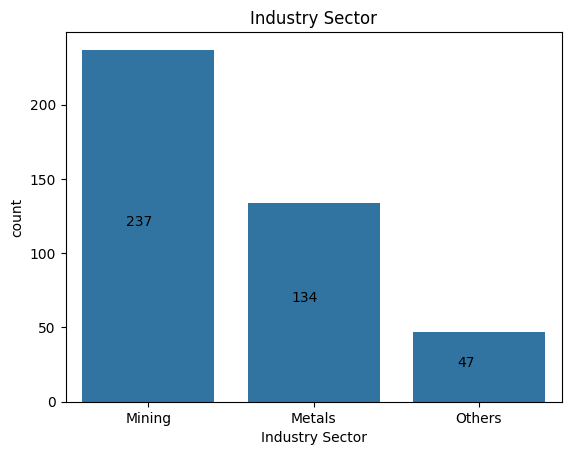

In [ ]:
# Chart to show the contribution of industries in accidents
ax = sns.countplot(x='Industry Sector',  data=data)
plt.title('Industry Sector')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x()+bar.get_width()/3,bar.get_height()/2))
plt.show()

<font color="Green"><strong>
**Observations:**

1.Accidents count for mining industry sector tops compared to metals and others.
</font>

Text(0.5, 1.0, 'Accidents trend by Industry')

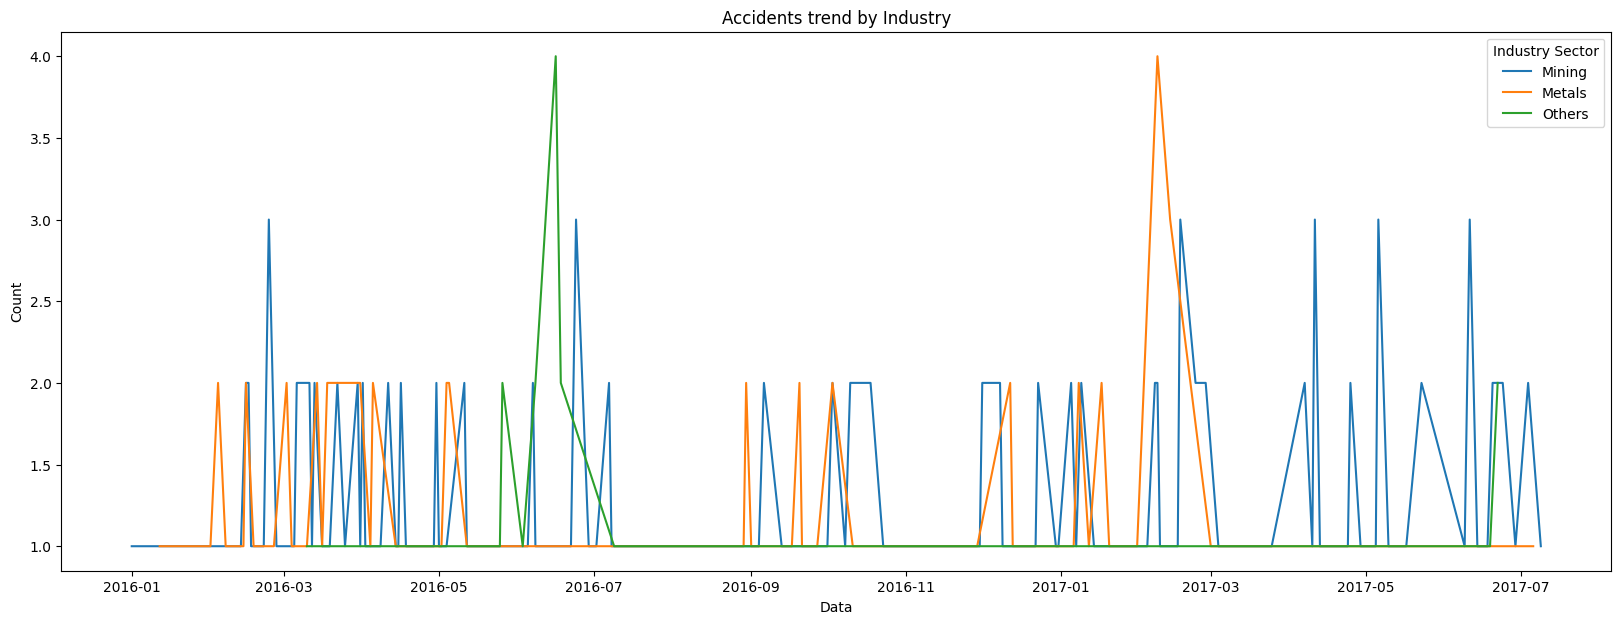

In [ ]:
# Plotting accident trend by industry
count_accidents = data.groupby(['Data', 'Industry Sector']).size().reset_index(name='Count')
plt.figure(figsize=(20,7))
sns.lineplot(count_accidents, x='Data',y= 'Count',hue= 'Industry Sector')
plt.title('Accidents trend by Industry')

<font color="Green"><strong>
**Observations:**

1.Data is from Jan 2016 till July 2017.<br>
2.Generally, Mining has been a contributing industry for accidents but few spikes is noticeable in the months of March'16, July'16 , March'17, May'17 & July'17 but sudden spike in accidents can be seen for Others & Metas in the the month of June 2016 & Feb 2017 respectively.
</font>

Text(0.5, 1.0, 'Accidents trend')

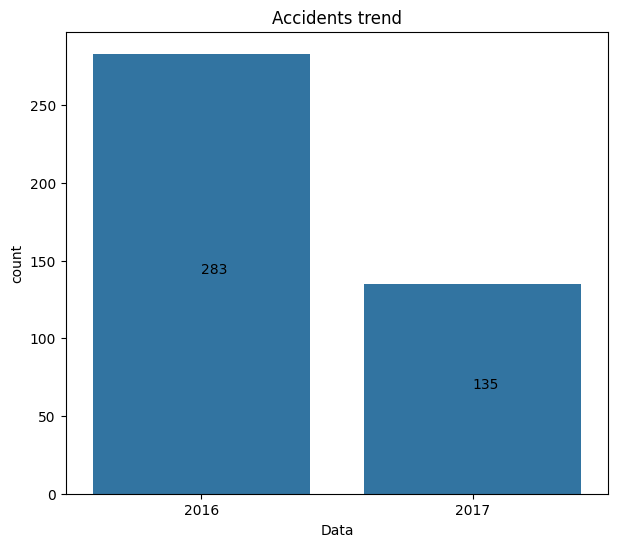

In [ ]:
# Plotting the Accident trend
#count_accidents = data.groupby('Data').size().reset_index(name='Count')
plt.figure(figsize=(7,6))
#sns.lineplot(count_accidents, x='Data',y= 'Count')
ax=sns.countplot(data,x=pd.DatetimeIndex(data['Data']).year)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()/2))
plt.title('Accidents trend')

<font color="Green"><strong>
**Observations:**

1.Number of accidents reported for year 2016 is 283.<br>
2.Number of accidents reported for the first half of year 2017 is 135.
</font>

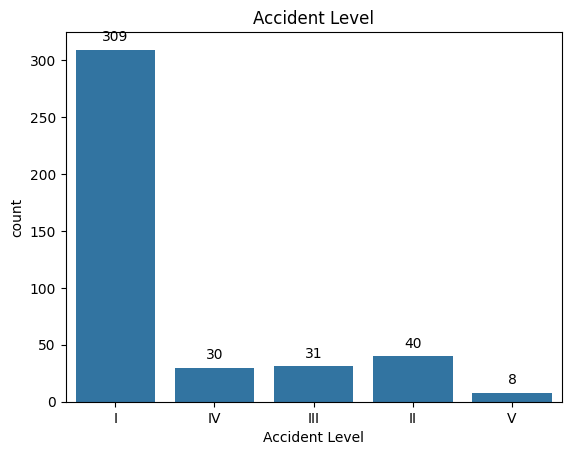

In [ ]:
# Chart to show the accident levels
ax = sns.countplot(x='Accident Level',  data=data)
plt.title('Accident Level')
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )

plt.show()

<font color="Green"><strong>
**Observations:**

1.More accidents are reported (309) for accident level I.<br>
2.Less accidents are reported for accident level V (8) which is considered as severe level.<br>
3.This also shows that the data is highly imbalanced.
</font>


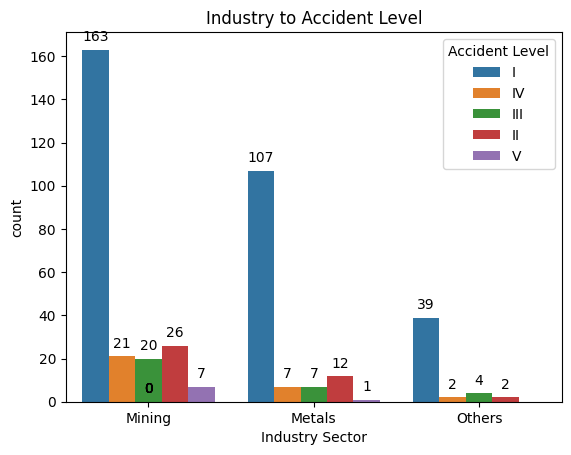

In [ ]:
# Chart to show the accident levels by Industry
ax = sns.countplot(x='Industry Sector',  data=data,hue= 'Accident Level')
plt.title('Industry to Accident Level')
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )

plt.show()

<font color="Green"><strong>
**Observations:**
1. 163 accidents are reported for accident level I for Mining.<br>
2. 107 accidents are reported for accident level I for Metals.<br>
3. 39 accidents are reported for accident level I for Others.<br>
4. Accident Level V is reported only in Mining & Metals Industry
</font>

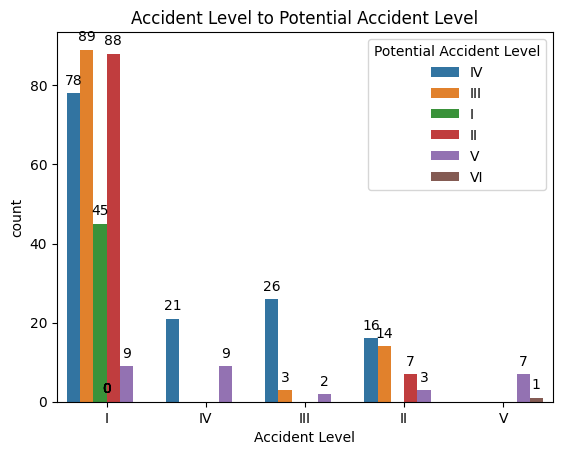

In [ ]:
# Chart to show the accident levels with respect to potential accident level
ax = sns.countplot(x='Accident Level',  data=data,hue= 'Potential Accident Level')
plt.title('Accident Level to Potential Accident Level')
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )

plt.show()

<font color="Green"><strong>
Observations:<br>
1.Above chart shows the variation of accidents reported for accident level against Potential accident level.<br>
2.accident level is compared to potential accident level for Level I:
   * 78 accidents are  reported for level IV
   * 89 accidents are reported for level III
   * 45 accidents are reported for level I
   * 88 accidents are reported for level II
   * 9 accidents are reported for level V
</font>

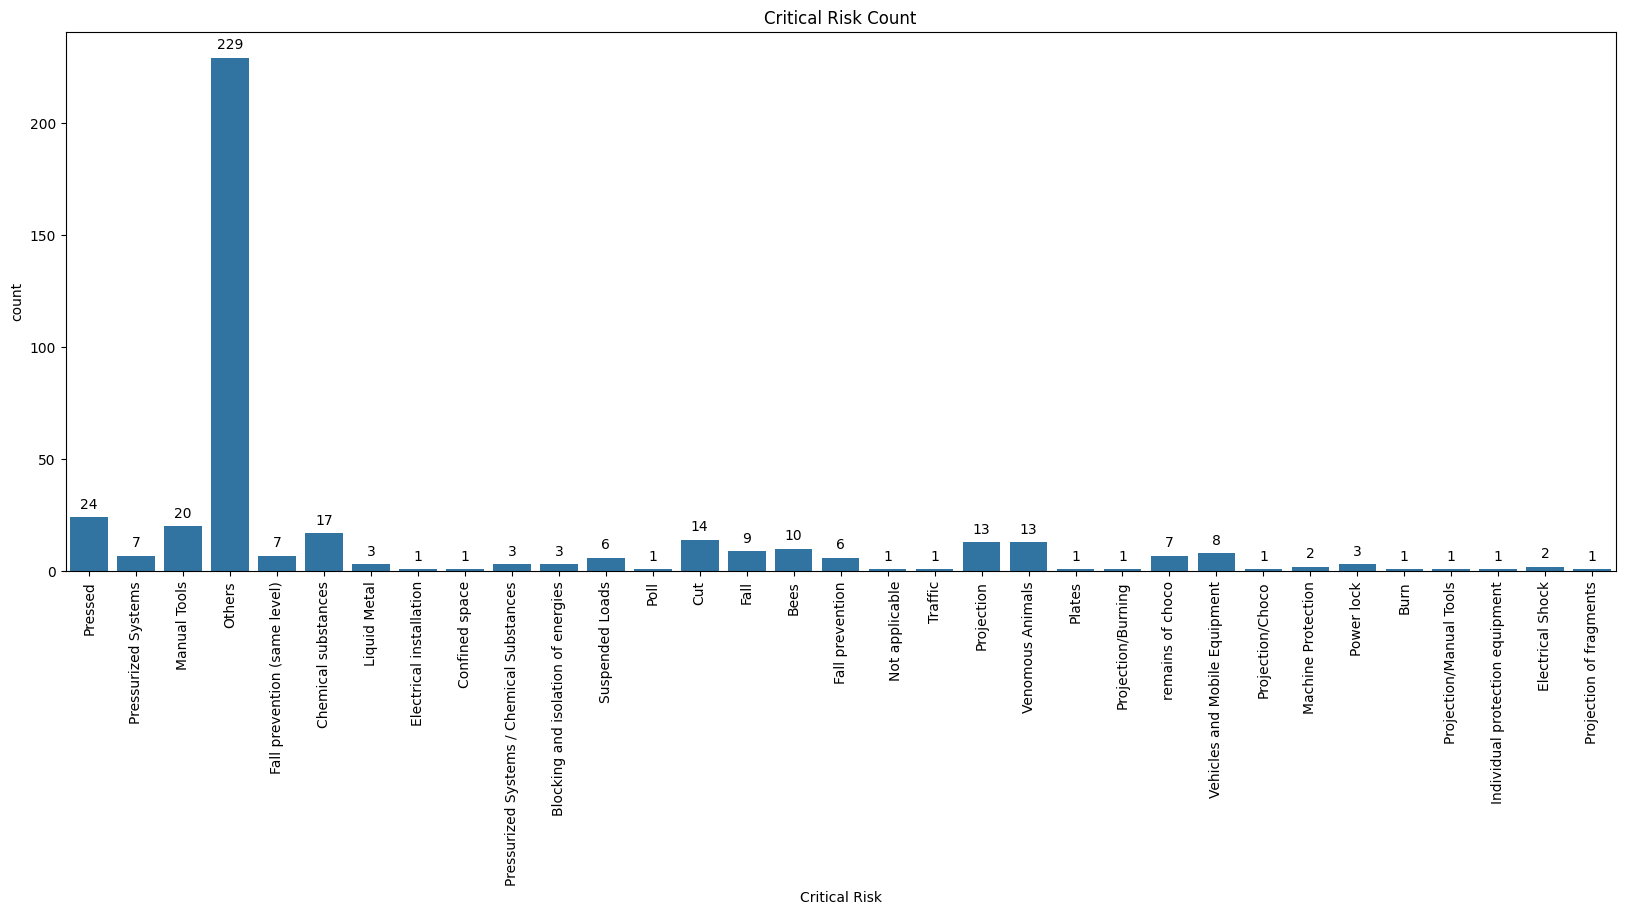

In [ ]:
# Chart to show the critical risks drivers
plt.figure(figsize=(20,7))
ax= sns.countplot(x='Critical Risk',  data=data)
plt.title('Critical Risk Count')
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )
plt.xticks(rotation=90)
plt.show()

<font color="Green"><strong>
**Observations:**<br>
1.Others (unidentified accidents) critical risk are high(229) in count.<br>
2.Pressed reported 24 accidents.<br>
3.Manual Tools reported 20 accidents.<br>
4.Chemical Substances reported 17 accidents.<br>
5.Cut reported 14 accidents.<br>
6.Projection and Venomous Animals reported 13 accidents.
</font>

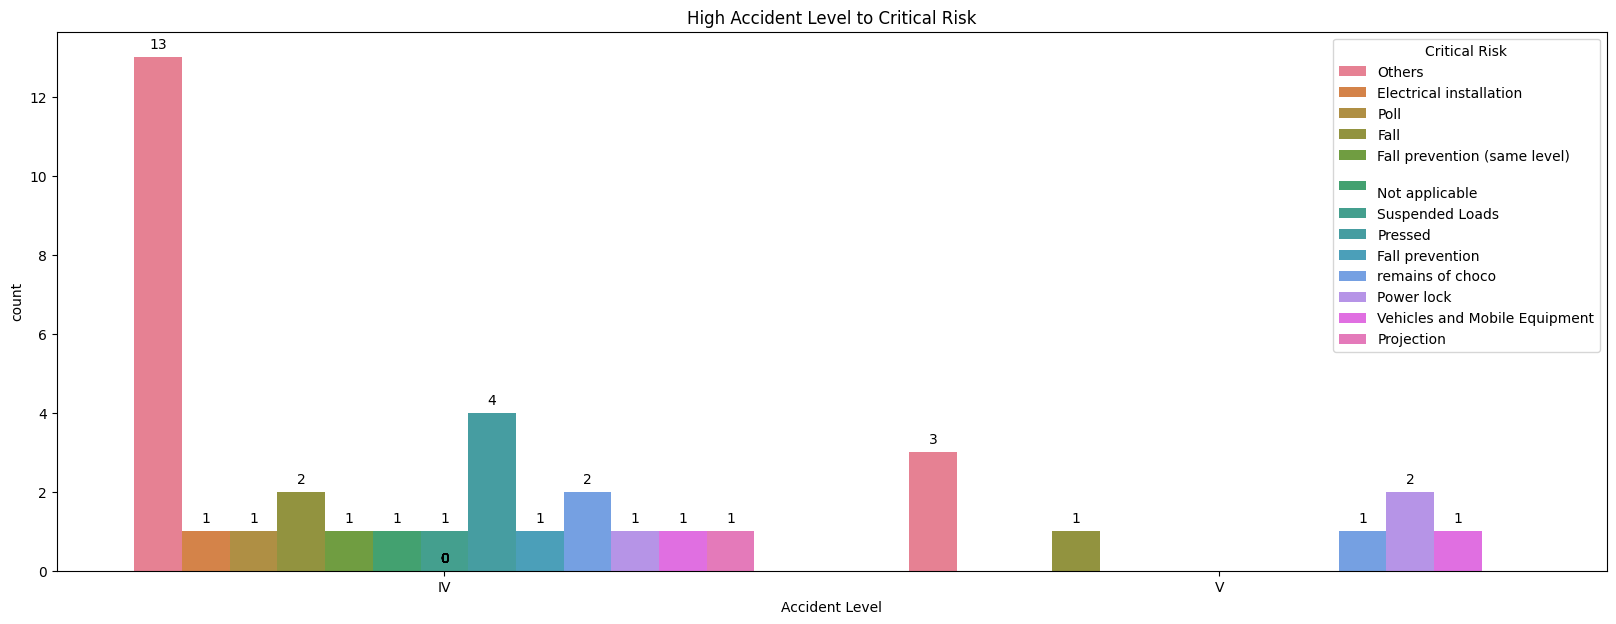

In [ ]:
# Plotting the Critical Risk factors for High Accident Level
plt.figure(figsize=(20,7))
high_level_accidents = data[(data['Accident Level'] == 'V') | (data['Accident Level'] == 'IV')]
ax= sns.countplot(x='Accident Level',  data=high_level_accidents,hue= 'Critical Risk')

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )
plt.title('High Accident Level to Critical Risk')
plt.show()

<font color="Green"><strong>
**Observations:**<br>
1.For Accidents level IV & V, Others is the Critical Reason which seems strange as the critical accidents don't have clear classification of Reason.<br>
2.Other Contributing factors are Suspended Loads, Remains of choco, Power Lock & Fall.
</font>

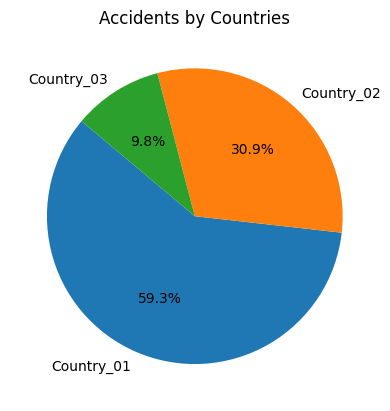

In [ ]:
# Plotting the accidents% by countries
count_countries = data.groupby(['Countries']).size().reset_index(name='Count')
plt.pie(count_countries['Count'],labels= count_countries['Countries'] , autopct='%1.1f%%', startangle=140)
plt.title('Accidents by Countries')
plt.show()

<font color="Green"><strong>
**Observations:**<br>
1.Country_01 has reported 59.3% accidents and is the highest contributor.<br>
2.Country_02 has reported 30.9% accidents.<br>
3.Country_03 has reported 9.8% accidents.
</font>

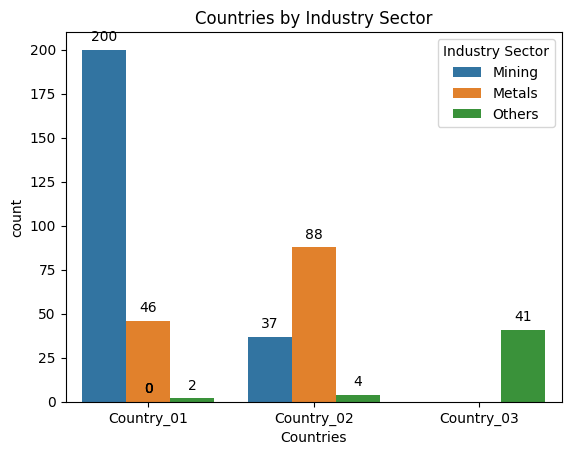

In [ ]:
# Plotting Countries by Industries
ax = sns.countplot(x='Countries',  data=data,hue= 'Industry Sector')
plt.title('Countries by Industry Sector')
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )

plt.show()

<font color="Green"><strong>
**Observations:**<br>
1.Mining Industry sector reports (200) high number of accidents for Country_01.<br>
2.Metals Industry sector reports (88) high number of accidents for Country_02.<br>
3.Others Industry sector  (41) high number of accidents for Country_03.<br>
4.This is an interseting insight to understand the pattern of accidents in each country based on industry.
</font>

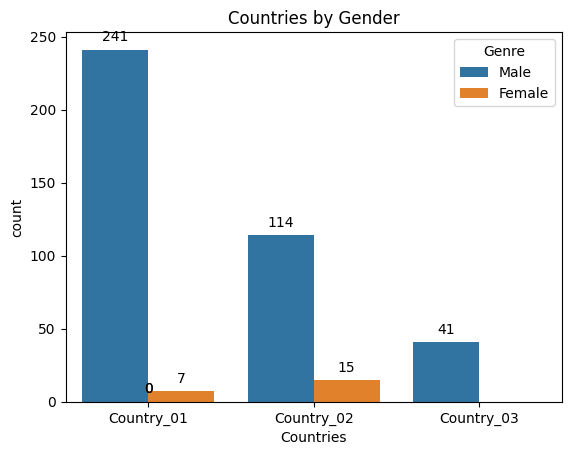

In [ ]:
# Plotting Countries by gender
ax = sns.countplot(x='Countries',  data=data,hue= 'Genre')
plt.title('Countries by Gender')
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )

plt.show()

<font color="Green"><strong>
**Observations:**<br>
1.In all countries Male gender is high in count.<br>
2.Country_3 doesn't have any accident impacting female, could be a possibility that no female is engaged in the industry.
</font>

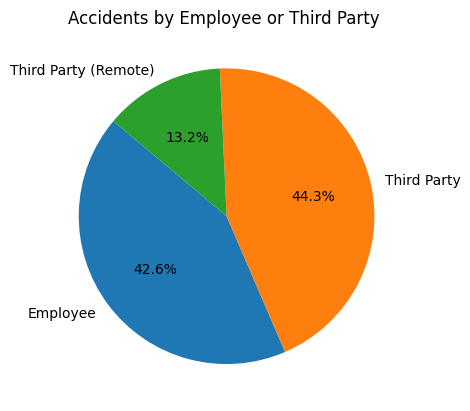

In [ ]:
# Plotting the accidents% by Employee or Third Party
count_countries = data.groupby(['Employee or Third Party']).size().reset_index(name='Count')
plt.pie(count_countries['Count'],labels= count_countries['Employee or Third Party'] , autopct='%1.1f%%', startangle=140)
plt.title('Accidents by Employee or Third Party ')
plt.show()

<font color="Green"><strong>
**Observations:**<br>
1.Accidents reported for Third Party is high (44.3%).<br>
2.Accidents reported for Employee is 42.6%.<br>
3.Accidents reported for Third Party (Remote) is 13.2%.<br>
</font>

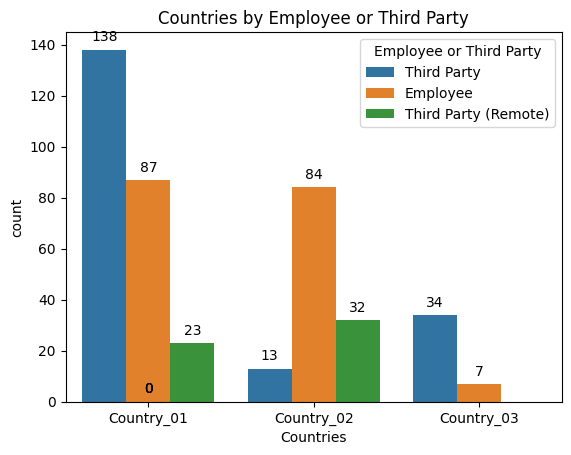

In [ ]:
# Plotting Countries by Employee or Third Party
ax = sns.countplot(x='Countries',  data=data,hue= 'Employee or Third Party')
plt.title('Countries by Employee or Third Party')
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )

plt.show()

<font color="Green"><strong>
**Observations:**<br>
1.Third Party accident counts are more (138) for Country_01.<br>
2.Employee accident counts are more (84) f0r Country_02.<br>
3.Third Party accident counts are more (34) for Country_03.<br>
</font>

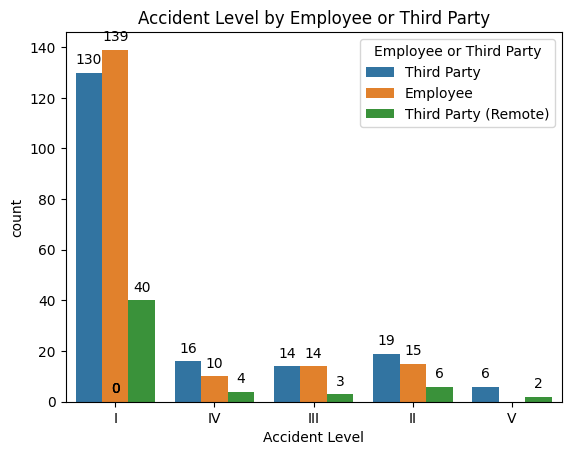

In [ ]:
# Plotting Accident Level by Employee or Third Party
ax = sns.countplot(x='Accident Level' ,  data=data,hue='Employee or Third Party')
plt.title('Accident Level by Employee or Third Party')
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )

plt.show()

<font color="Green"><strong>
**Observations:**<br>
1.Employee accidents are more(139) for accident level I.<br>
2.Third party accidents are more(19) for accident level II.<br>
3.Third party and Employee are equally more (14) for accident level III.<br>
4.Third party accidents are more (16) fro accident level IV.<br>
5.Third Party accidents are more(6) for accident level V.<br>
</font>

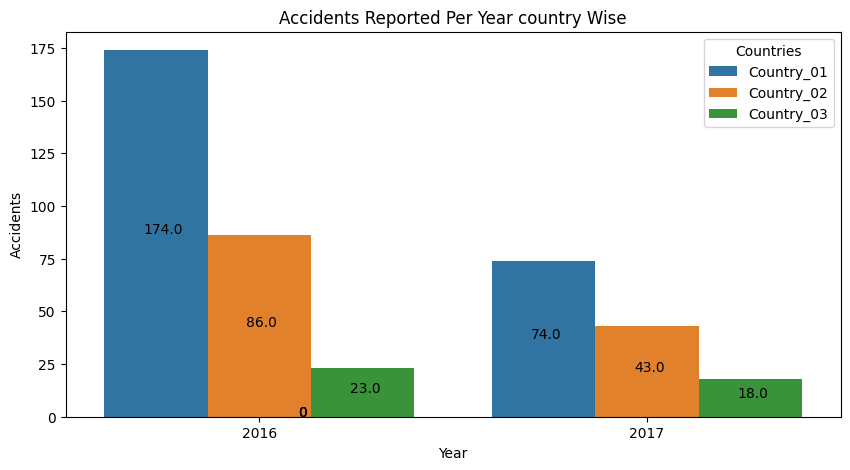

In [ ]:
#explore accidents reported year and country wise
plt.figure(figsize=(10,5))
ax=sns.countplot(data=data,x=pd.DatetimeIndex(data['Data']).year,hue='Countries')
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),(bar.get_x()+0.1,bar.get_height()/2))
plt.title('Accidents Reported Per Year country Wise')
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.show()

<font color="Green"><strong>
**Observation:**<br>
1.Number of accidents reported for each year is constantly high for the country Country_01 compared to others.<br>
2.Accidents have been reduced to half in the year 2017 compared to 2016.<br>
</font>

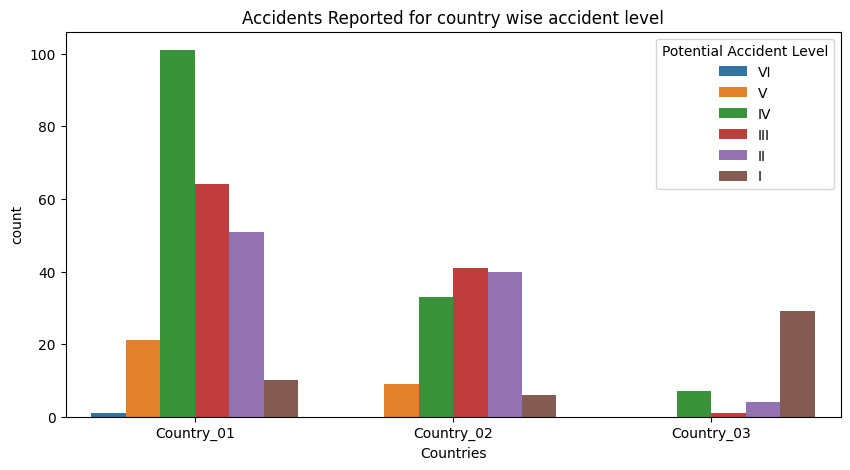

In [ ]:
#country wise accident level
plt.figure(figsize=(10,5))
df=data.sort_values('Potential Accident Level',ascending=False)
sns.countplot(data=df,x='Countries',hue='Potential Accident Level')
plt.title('Accidents Reported for country wise accident level')
plt.show()

In [ ]:
#pivot table for the above chart
dt=data.groupby(['Countries','Potential Accident Level']).count()
print(dt['Critical Risk'])

Countries   Potential Accident Level
Country_01  I                            10
            II                           51
            III                          64
            IV                          101
            V                            21
            VI                            1
Country_02  I                             6
            II                           40
            III                          41
            IV                           33
            V                             9
Country_03  I                            29
            II                            4
            III                           1
            IV                            7
Name: Critical Risk, dtype: int64


<font color="Green"><strong>
**Observations:**<br>
highest level Potential accident level for each country is as follows:
* Country_01 - IV - 101
* Country_02 - II and III - 40 and 41
* country_03 - I - 29 <br><br>
high risk accident level for each country is as follows:
* Country_01 = VI - 1
* Country_02 - V - 33
* Country_03 - IV - 7
</font>

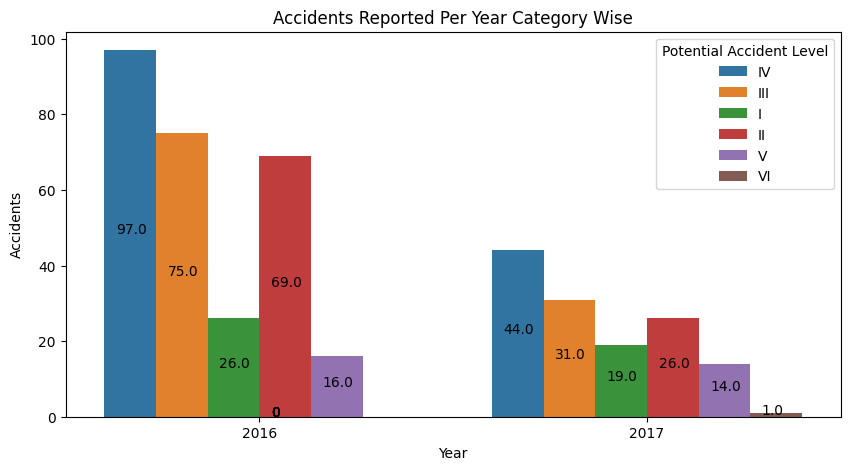

In [ ]:
#explore potential accidents category wise report for each year.
plt.figure(figsize=(10,5))
ax=sns.countplot(data=data,x=pd.DatetimeIndex(data['Data']).year,hue='Potential Accident Level')
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),(bar.get_x()+0.03,bar.get_height()/2))
plt.title('Accidents Reported Per Year Category Wise')
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.show()

In [ ]:
#pivot table for the above chart
data['datepart']=pd.DatetimeIndex(data['Data']).year
dt=data.groupby(['datepart','Potential Accident Level']).count()
dtsort=dt.sort_values(['datepart','Potential Accident Level'],ascending=True)
print(dtsort['Data'])

datepart  Potential Accident Level
2016      I                           26
          II                          69
          III                         75
          IV                          97
          V                           16
2017      I                           19
          II                          26
          III                         31
          IV                          44
          V                           14
          VI                           1
Name: Data, dtype: int64


<font color="Green"><strong>
**Observations:**<br>
1.Potential accident levels IV,II and III are reported with high number of accidents for both year 2016 and 2017.<br>
2.Measures have to be taken to reduce these accident levels in future.
</font>

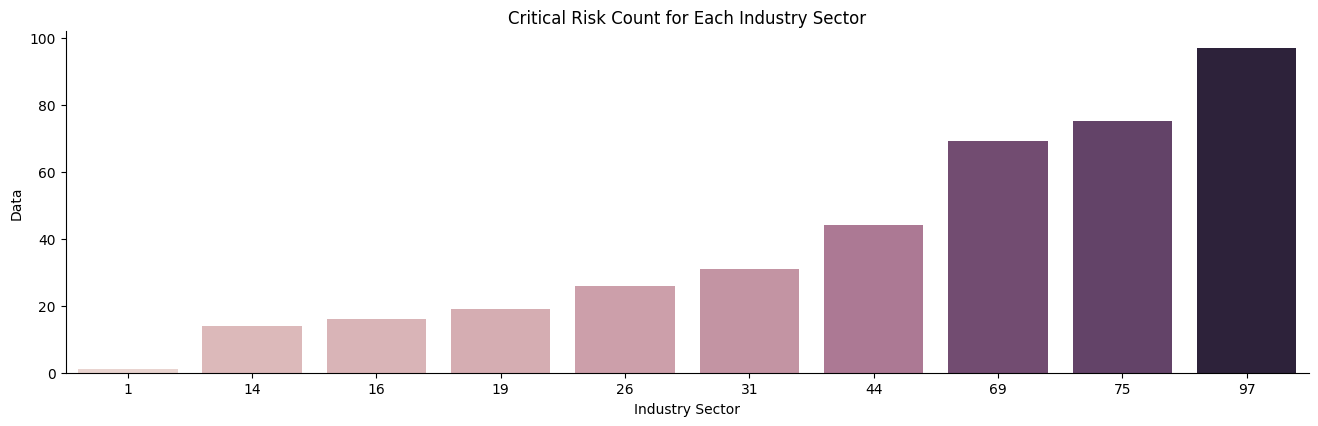

In [ ]:
#plot critical risk count for each industry sector.
sns.catplot(data=dt,kind="bar",x="Industry Sector",y='Data',hue="Critical Risk",legend=False)
ax = plt.gca()
fig = plt.gcf()

# Resetting figure size
fig.set_size_inches(15, 4)
plt.title('Critical Risk Count for Each Industry Sector')
plt.show()

In [ ]:
#table for the above plot for more clarity
#count of critical risk industry sector wise
dt=data.groupby(['Industry Sector','Critical Risk']).count()
print(dt['Data'])

Industry Sector  Critical Risk                            
Metals           \nNot applicable                               1
                 Blocking and isolation of energies             3
                 Burn                                           1
                 Chemical substances                           15
                 Confined space                                 1
                 Cut                                           10
                 Fall                                           2
                 Fall prevention                                3
                 Fall prevention (same level)                   6
                 Liquid Metal                                   3
                 Machine Protection                             2
                 Manual Tools                                  14
                 Others                                        33
                 Plates                                         1
                 

<font color="Green"><strong>
**Observations:**<br>
1.There are 3 Industry Sectors Metals,Mining and others.<br>
2.Accidents are reported high in "others" category of "Critical Risk" in all sectors.This indicates accidents whose critical risk are unidentified are more.<br>
3.In Metals Industry sector critical risk are more in the below category:
  Pressed,Chemical Substances,Manual Tools,Cut.<br>
4.In Mining Industry sector critical risk are more in the below category:
 Pressed,Remains of Choco,Vehicles and mobile Equipment,Projection.<br>
5.Bees and Venomous Animals are the critical risk high in number for Others Industry sector.<br>
6.Mining has high number of accidents in others critical risk(179).<br>
</font>

In [ ]:
#count of critical risk potential accident level wise
crosstab = pd.crosstab(data['Critical Risk'], data['Potential Accident Level']).sort_values(by='Critical Risk', ascending=True)
crosstab.sort_values(by=['I', 'II', 'III', 'IV', 'V', 'VI'], ascending=False)

Potential Accident Level,I,II,III,IV,V,VI
Critical Risk,,,,,,
Others,16,60,53,85,15,0
Venomous Animals,10,2,1,0,0,0
Bees,10,0,0,0,0,0
Pressed,2,5,9,7,1,0
Manual Tools,2,5,9,4,0,0
Cut,1,6,5,2,0,0
Fall,1,1,4,2,1,0
Fall prevention (same level),1,1,3,2,0,0
Fall prevention,1,0,0,5,0,0


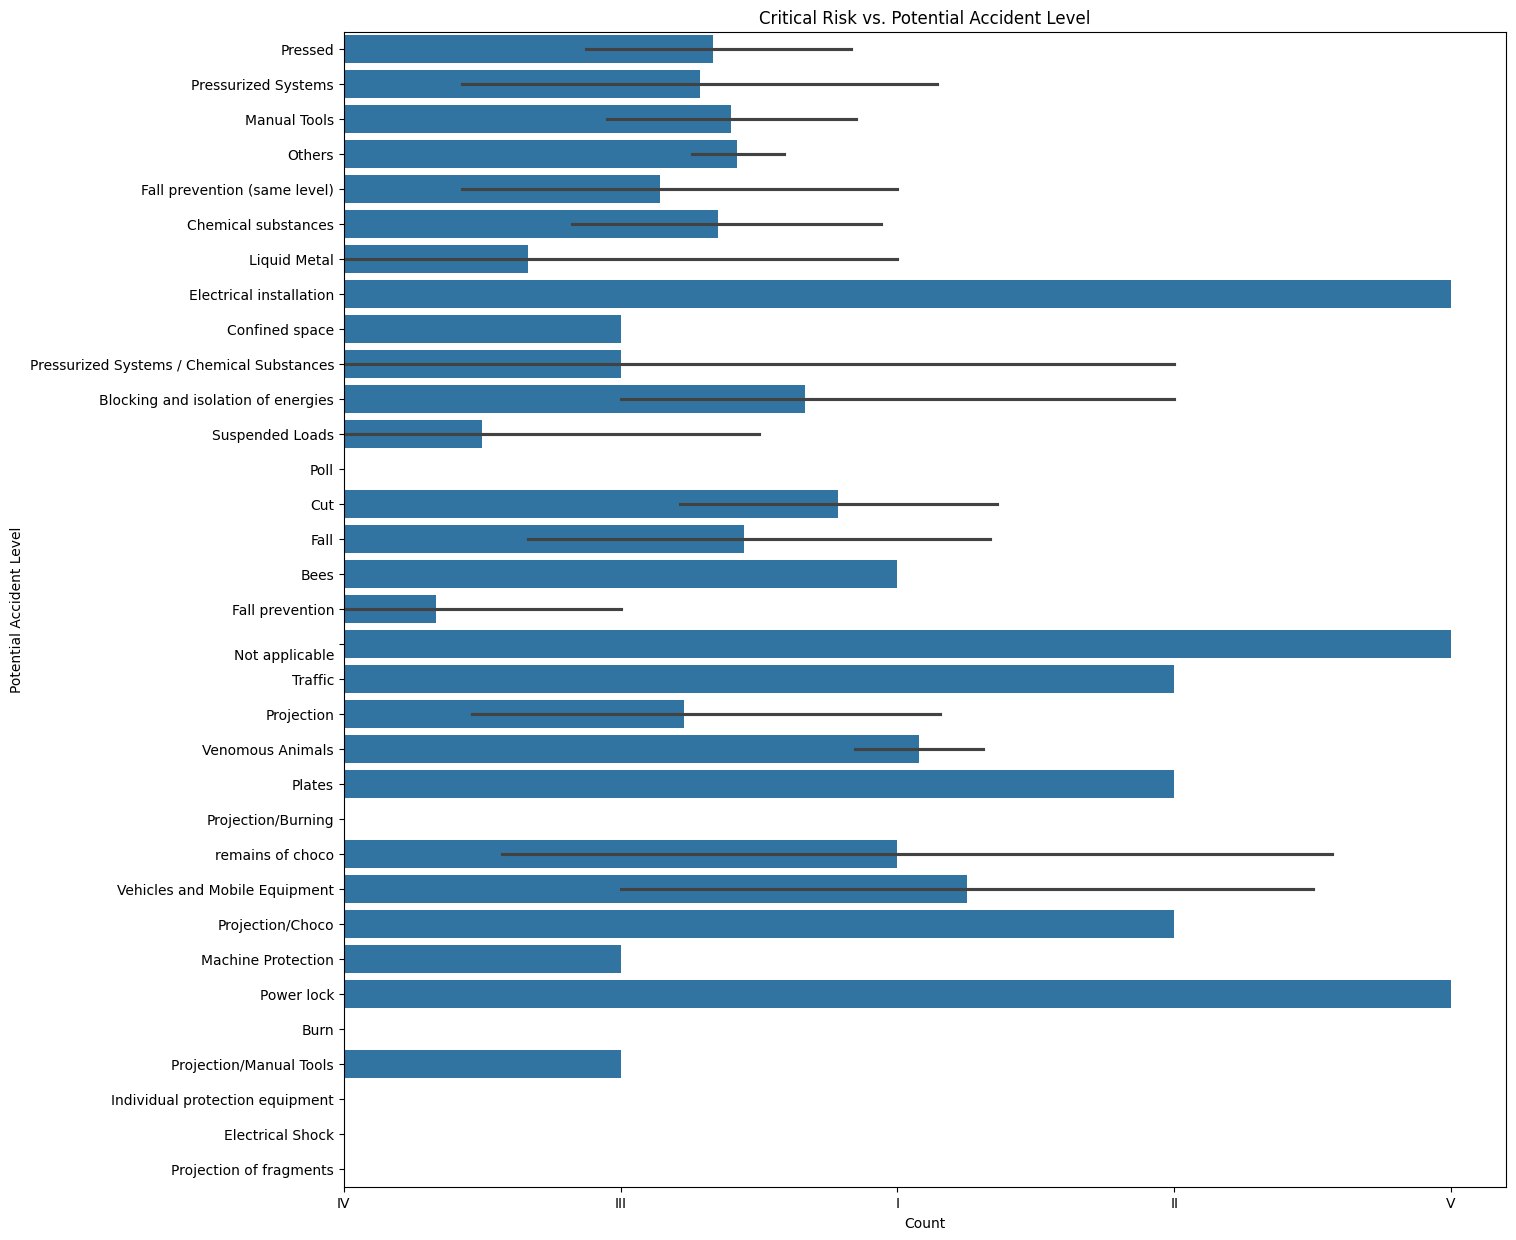

In [ ]:
# Horizontal bar chart with Critical Risk at the row bar and Potential Accident Level at the column bar sorted by desc
# Create a crosstab of Critical Risk and Potential Accident Level
crosstab = pd.crosstab(data['Critical Risk'], data['Potential Accident Level']).sort_values(by=['I', 'II', 'III', 'IV', 'V', 'VI'], ascending=False)
plt.figure(figsize=(15,15))
# Plot the crosstab as a horizontal bar chart
ax=sns.barplot(data=crosstab,y=data['Critical Risk'],x=data['Potential Accident Level'],orient='h')
#crosstab.plot(kind='barh')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Potential Accident Level')
plt.title('Critical Risk vs. Potential Accident Level')

# Show the plot
plt.show()

<font color="Green"><strong>
**Observations:**<br>
1.Only 1 accident is reported for high accident level VI under critical risk "remains of choco".<br>
2.High accident levels are reported in Others critical risk 86,60,53,17 and 16 for accident levels IV,II,III,I and V respectively.
</font>

Milestone 1:

Step 3: Data preprocessing (NLP Preprocessing techniques)

In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
# Applying the function to remove special characters
data['cleaned_text'] = data['Description'].apply(remove_special_characters)

In [ ]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [ ]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Description','cleaned_text']]

,Description,cleaned_text
0,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo 08 maintenance superv...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...
2,In the sub-station MILPO located at level +170...,sub station milpo located level 170 collaborat...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approximately nv 1880 cx 695 ob7 personne...


In [ ]:
# Loading the Lemmatizer
lr = WordNetLemmatizer()

In [ ]:
# defining a function to perform Lemmatization
def apply_Lemmatizer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Lemmatizer on every word of a message and joining the Lemmatized words back into a single string
    new_text = ' '.join([lr.lemmatize(word) for word in words])

    return new_text

In [ ]:
# Applying the function to perform Lemmatization
data['cleaned_text'] = data['cleaned_text'].apply(apply_Lemmatizer)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Description','cleaned_text']]

,Description,cleaned_text
0,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo 08 maintenance superv...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...
2,In the sub-station MILPO located at level +170...,sub station milpo located level 170 collaborat...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approximately nv 1880 cx 695 ob7 personne...


Milestone 1:

Step 4:  Data preparation - Cleansed data in .xlsx or .csv file

In [ ]:
#Using TF IDF Vectorizer
Tf_idf_vectorizer = TfidfVectorizer()
tfidf_matrix = Tf_idf_vectorizer.fit_transform(data['cleaned_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=Tf_idf_vectorizer.get_feature_names_out())
tfidf_df.head()

,00,001,007,01,018,0183,02,020,02bp0166,02bp0167,...,young,z014,zaf,zamac,zaro,zero,zinc,zinco,zn,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.17778,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Sum the TF-IDF scores for each word
word_scores = tfidf_df.sum(axis=0)

# Sort the words by their TF-IDF scores
sorted_word_scores = word_scores.sort_values(ascending=False)

print("Most useful words:")
print(sorted_word_scores.head(10))  # Adjust the number to see more or fewer words

Most useful words:
employee    14.834732
hand        13.102482
causing     12.300681
right       11.707510
left        11.706044
operator    10.744372
activity    10.333091
injury       9.033337
time         8.546456
pipe         8.374694
dtype: float64


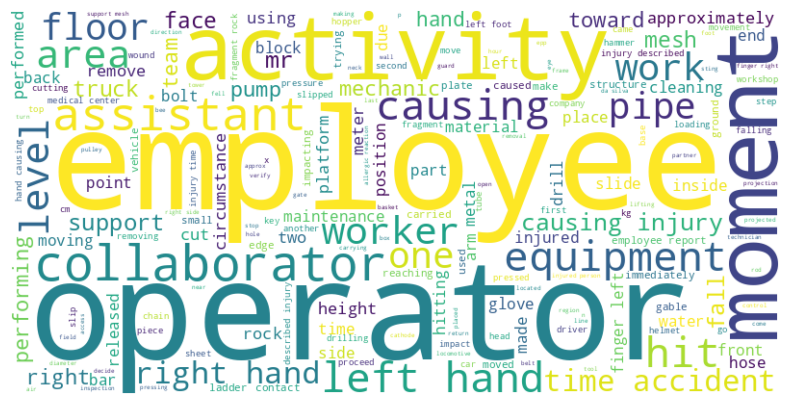

In [ ]:
#Creating a word cloud to view the most useful words
from wordcloud import WordCloud

# Combine all text entries into a single string
text = " ".join(data['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Milestone 1:

Step 5: Design train and test basic machine learning classifiers

In [ ]:
# As Accident level is the target variable, Encoding the  Accident Level column values
df1 = data.copy()
df1['Accident Level'] = LabelEncoder().fit_transform(df1['Accident Level']).astype(np.int8)
print (df1['Accident Level'].head())

0    0
1    0
2    0
3    0
4    3
Name: Accident Level, dtype: int8


In [ ]:
# Creating dependent & independent variables
X = tfidf_df.copy()
y = df1['Accident Level']

In [ ]:
y.unique()

array([0, 3, 2, 1, 4], dtype=int8)

In [ ]:
X.shape, y.shape

((418, 3083), (418,))

In [ ]:
# Splitting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:
# Print shape of train & test data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (334, 3083)
y_train shape: (334,)
X_test shape: (84, 3083)
y_test shape: (84,)


<font color="Magenta"><strong>
**Use SMOTE to create oversampling data**
</font>

In [ ]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [ ]:
X_smote.shape, y_smote.shape

((1545, 3083), (1545,))

In [ ]:
# Splitting the data into training (80%) and testing (20%)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.20, stratify=y_smote, random_state=42)

In [ ]:
# Print shape of train & test data
print("X_train_smote shape:", X_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)
print("X_test_smote shape:", X_test_smote.shape)
print("y_test_smote shape:", y_test_smote.shape)

X_train_smote shape: (1236, 3083)
y_train_smote shape: (1236,)
X_test_smote shape: (309, 3083)
y_test_smote shape: (309,)


In [ ]:
#create function to predict & print performnace metrics

def perf_metrics(model,flag=True):

    score_list = []
    #make prediction on train & test
    pred_train= model.predict(X_train)
    pred_test= model.predict(X_test)

    #calculate accuracy on train & test
    train_acc= accuracy_score(y_train,pred_train)
    test_acc= accuracy_score(y_test,pred_test)

    #calculate recall on train & test
    train_rec= recall_score(y_train,pred_train, average='weighted')
    test_rec= recall_score(y_test,pred_test, average='weighted')

    #calculate precision on train & test
    train_pre= precision_score(y_train,pred_train,average='weighted')
    test_pre= precision_score(y_test,pred_test,average='weighted')

    #calculate F1 score on train & test
    train_F1= f1_score(y_train,pred_train,average='weighted')
    test_F1= f1_score(y_test,pred_test,average='weighted')

    score_list.extend((train_acc,test_acc,train_rec,test_rec,train_pre,test_pre,train_F1,test_F1))


    if flag==True:
        print('Accuracy on training data:', accuracy_score(y_train,pred_train))
        print('Accuracy on testing data:', accuracy_score(y_test,pred_test))
        print('Recall on training data:', recall_score(y_train,pred_train,average='weighted'))
        print('Recall on testing data:', recall_score(y_test,pred_test,average='weighted'))
        print('Precision on training data:', precision_score(y_train,pred_train,average='weighted'))
        print('Precision on testing data:', precision_score(y_test,pred_test,average='weighted'))
        print('F1 score on training data:', f1_score(y_train,pred_train,average='weighted'))
        print('F1 score on testing data:', f1_score(y_test,pred_test,average='weighted'))

    return score_list

def confusion_mat(model,y_test,labels=[0, 3, 2, 1, 4]):
    pred_test= model.predict(X_test)
    cm=confusion_matrix(y_test, pred_test, labels=[0, 3, 2, 1, 4])
    df_cm = pd.DataFrame(cm, index = [i for i in [0, 3, 2, 1, 4]],columns = [i for i in [0, 3, 2, 1, 4]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#create function to predict & print performnace metrics for smote

def perf_metrics_smote(model,flag=True):

    score_list = []
    #make prediction on train & test
    pred_train_smote= model.predict(X_train_smote)
    pred_test_smote= model.predict(X_test_smote)

    #calculate accuracy on train & test
    train_acc_smote= accuracy_score(y_train_smote,pred_train_smote)
    test_acc_smote= accuracy_score(y_test_smote,pred_test_smote)

    #calculate recall on train & test
    train_rec_smote= recall_score(y_train_smote,pred_train_smote, average='weighted')
    test_rec_smote= recall_score(y_test_smote,pred_test_smote, average='weighted')

    #calculate precision on train & test
    train_pre_smote= precision_score(y_train_smote,pred_train_smote,average='weighted')
    test_pre_smote= precision_score(y_test_smote,pred_test_smote,average='weighted')

    #calculate F1 score on train & test
    train_F1_smote= f1_score(y_train_smote,pred_train_smote,average='weighted')
    test_F1_smote= f1_score(y_test_smote,pred_test_smote,average='weighted')

    score_list.extend((train_acc_smote,test_acc_smote,train_rec_smote,test_rec_smote,train_pre_smote,test_pre_smote,train_F1_smote,test_F1_smote))


    if flag==True:
        print('Accuracy on training data:', accuracy_score(y_train_smote,pred_train_smote))
        print('Accuracy on testing data:', accuracy_score(y_test_smote,pred_test_smote))
        print('Recall on training data:', recall_score(y_train_smote,pred_train_smote,average='weighted'))
        print('Recall on testing data:', recall_score(y_test_smote,pred_test_smote,average='weighted'))
        print('Precision on training data:', precision_score(y_train_smote,pred_train_smote,average='weighted'))
        print('Precision on testing data:', precision_score(y_test_smote,pred_test_smote,average='weighted'))
        print('F1 score on training data:', f1_score(y_train_smote,pred_train_smote,average='weighted'))
        print('F1 score on testing data:', f1_score(y_test_smote,pred_test_smote,average='weighted'))

    return score_list

def confusion_mat_smote(model,y_test_smote,labels=[0, 3, 2, 1, 4]):
    pred_test_smote= model.predict(X_test_smote)
    cm=confusion_matrix(y_test_smote, pred_test_smote, labels=[0, 3, 2, 1, 4])
    df_cm = pd.DataFrame(cm, index = [i for i in [0, 3, 2, 1, 4]],columns = [i for i in [0, 3, 2, 1, 4]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#Model-1 Decision Tree
dTree = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=10,min_samples_leaf=5)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=10)

The performance metrics of Decision tree is as below: 

Accuracy on training data: 0.781437125748503
Accuracy on testing data: 0.7023809523809523
Recall on training data: 0.781437125748503
Recall on testing data: 0.7023809523809523
Precision on training data: 0.6901972876603643
Precision on testing data: 0.5443452380952382
F1 score on training data: 0.7242766069232011
F1 score on testing data: 0.613346747149564
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.54      0.70      0.61        84



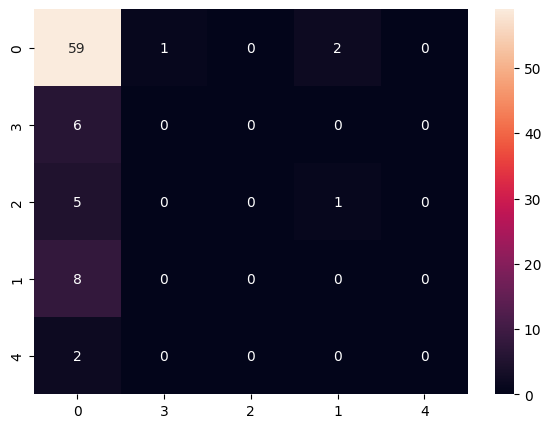

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Decision tree is as below: \n")
perf_metrics(dTree)
print(classification_report(y_test, dTree.predict(X_test)))
confusion_mat(dTree,y_test)

In [ ]:
#Hypertuning the parameters using Grid Search
#Use differemt parameters

dTree_params = {'criterion':['gini','entropy'],'max_depth':[3,4,5,6,7,8,9,10,11,12]}
dTree_gs = GridSearchCV(DecisionTreeClassifier(), dTree_params,cv=3)

# fit the model on our train set
dTree_g_res = dTree_gs.fit(X_train, y_train)

#get the best score
dTree_g_res.best_score_

0.72750429000429

In [ ]:
# get the hyperparameters with the best score
dTree_g_res.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [ ]:
# use the best hyperparameters
dTree_best = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, random_state=1)
dTree_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

The performance metrics of Decision tree Hypertuned is as below: 

Accuracy on training data: 0.7724550898203593
Accuracy on testing data: 0.7023809523809523
Recall on training data: 0.7724550898203593
Recall on testing data: 0.7023809523809523
Precision on training data: 0.70625664558733
Precision on testing data: 0.5376249265138154
F1 score on training data: 0.6946518845372339
F1 score on testing data: 0.609057609057609
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.54      0.70      0.61        84



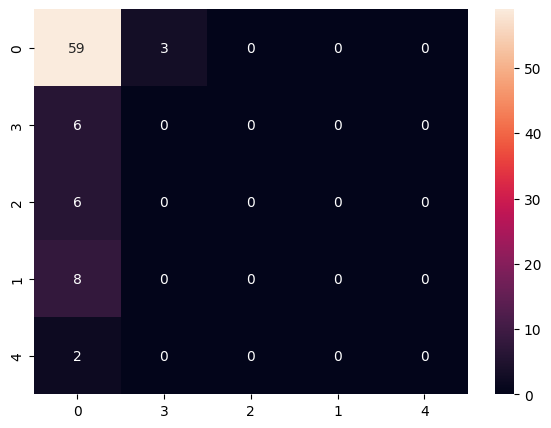

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Decision tree Hypertuned is as below: \n")
perf_metrics(dTree_best)
print(classification_report(y_test, dTree_best.predict(X_test)))
confusion_mat(dTree_best,y_test)

In [ ]:
# use the best hyperparameters
dTree_best_smote = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, random_state=1)
dTree_best_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=3, random_state=1)

The performance metrics of Decision tree Hypertuned is as below: 

Accuracy on training data: 0.42880258899676377
Accuracy on testing data: 0.41423948220064727
Recall on training data: 0.42880258899676377
Recall on testing data: 0.41423948220064727
Precision on training data: 0.6488329616845153
Precision on testing data: 0.6336681889596525
F1 score on training data: 0.35779794973878676
F1 score on testing data: 0.3315352656025757
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        62
           1       0.25      1.00      0.40        61
           2       0.00      0.00      0.00        62
           3       0.91      0.16      0.27        62
           4       1.00      0.90      0.95        62

    accuracy                           0.41       309
   macro avg       0.63      0.42      0.33       309
weighted avg       0.63      0.41      0.33       309



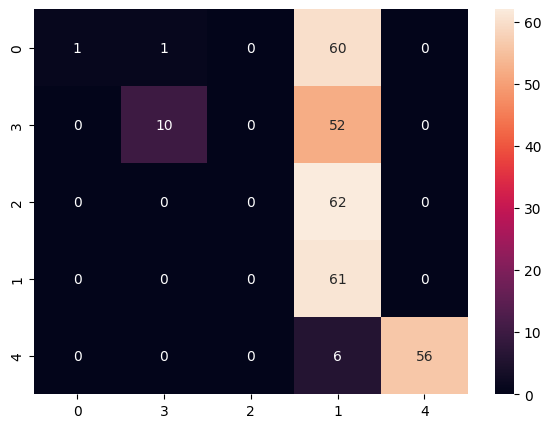

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Decision tree Hypertuned is as below: \n")
perf_metrics_smote(dTree_best_smote)
print(classification_report(y_test_smote, dTree_best_smote.predict(X_test_smote)))
confusion_mat_smote(dTree_best_smote,y_test_smote)

In [ ]:
#Model-2 Random Forest

rf = RandomForestClassifier(n_estimators=100, max_depth=7,random_state=10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=10)

The performance metrics of Random Forest is as below: 

Accuracy on training data: 0.7395209580838323
Accuracy on testing data: 0.7380952380952381
Recall on training data: 0.7395209580838323
Recall on testing data: 0.7380952380952381
Precision on training data: 0.5468912474452293
Precision on testing data: 0.5447845804988662
F1 score on training data: 0.6287837406082842
F1 score on testing data: 0.6268754076973255
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



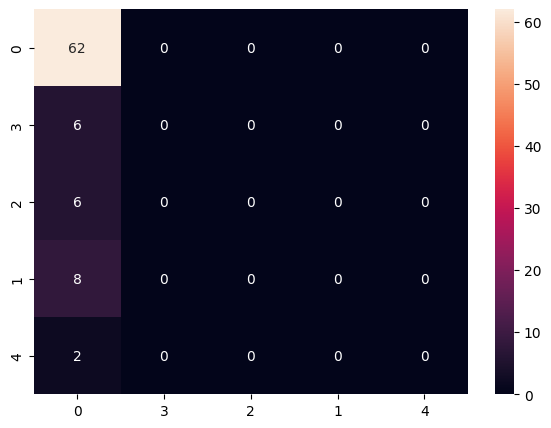

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Random Forest is as below: \n")
perf_metrics(rf)
print(classification_report(y_test, rf.predict(X_test)))
confusion_mat(rf,y_test)

In [ ]:
#Hypertuning the parameters using Grid Search
#Use differemt parameters

rf_params = {'n_estimators':[50,100,150,200], 'max_depth': [3,5,7,9],
             'max_features':[5,6,7,8,9,10]}
rf_gs = GridSearchCV(RandomForestClassifier(), rf_params,cv=3)

# fit the model on our train set
rf_g_res = rf_gs.fit(X_train, y_train)

#get the best score
rf_g_res.best_score_

0.7395163020163021

In [ ]:
# get the hyperparameters with the best score
rf_g_res.best_params_

{'max_depth': 3, 'max_features': 5, 'n_estimators': 50}

In [ ]:
# use the best hyperparameters
rf_best = RandomForestClassifier(random_state=1,max_depth = 3, max_features = 5, n_estimators = 50)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=5, n_estimators=50,
                       random_state=1)

The performance metrics of Random Forest with hypertuning is as below: 

Accuracy on training data: 0.7395209580838323
Accuracy on testing data: 0.7380952380952381
Recall on training data: 0.7395209580838323
Recall on testing data: 0.7380952380952381
Precision on training data: 0.5468912474452293
Precision on testing data: 0.5447845804988662
F1 score on training data: 0.6287837406082842
F1 score on testing data: 0.6268754076973255
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



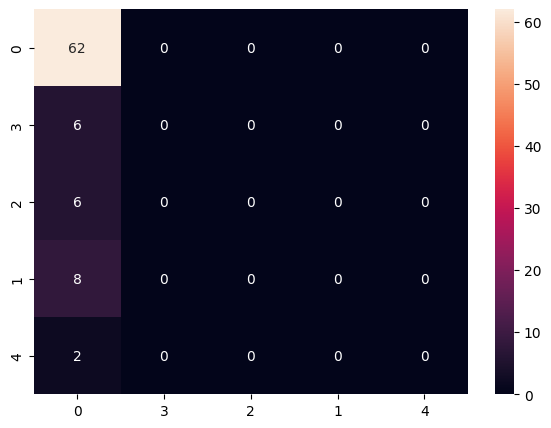

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Random Forest with hypertuning is as below: \n")
perf_metrics(rf_best)
print(classification_report(y_test, rf_best.predict(X_test)))
confusion_mat(rf_best,y_test)

In [ ]:
# use the best hyperparameters
rf_best_smote = RandomForestClassifier(random_state=1,max_depth = 3, max_features = 5, n_estimators = 50)
rf_best_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=3, max_features=5, n_estimators=50,
                       random_state=1)

The performance metrics of Random Forest with hypertuning is as below: 

Accuracy on training data: 0.8543689320388349
Accuracy on testing data: 0.8478964401294499
Recall on training data: 0.8543689320388349
Recall on testing data: 0.8478964401294499
Precision on training data: 0.8683062500180685
Precision on testing data: 0.8601603914943454
F1 score on training data: 0.8583700952540724
F1 score on testing data: 0.8519694952568063
              precision    recall  f1-score   support

           0       0.63      0.74      0.68        62
           1       0.78      0.80      0.79        61
           2       0.93      0.82      0.87        62
           3       0.96      0.87      0.92        62
           4       1.00      1.00      1.00        62

    accuracy                           0.85       309
   macro avg       0.86      0.85      0.85       309
weighted avg       0.86      0.85      0.85       309



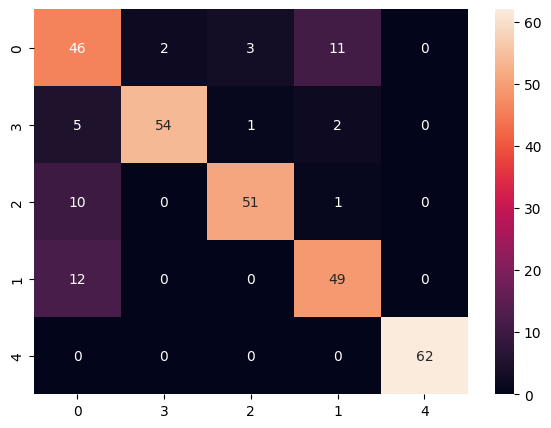

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Random Forest with hypertuning is as below: \n")
perf_metrics_smote(rf_best_smote)
print(classification_report(y_test_smote, rf_best_smote.predict(X_test_smote)))
confusion_mat_smote(rf_best_smote,y_test_smote)

In [ ]:
# Model-3 Support Vector Classifier (SVC)

svc = SVC(random_state=1)
svc.fit(X_train, y_train)

SVC(random_state=1)

The performance metrics of SVC Model is as below: 

Accuracy on training data: 0.7754491017964071
Accuracy on testing data: 0.7380952380952381
Recall on training data: 0.7754491017964071
Recall on testing data: 0.7380952380952381
Precision on training data: 0.8097872577825714
Precision on testing data: 0.5447845804988662
F1 score on training data: 0.702511657621473
F1 score on testing data: 0.6268754076973255
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



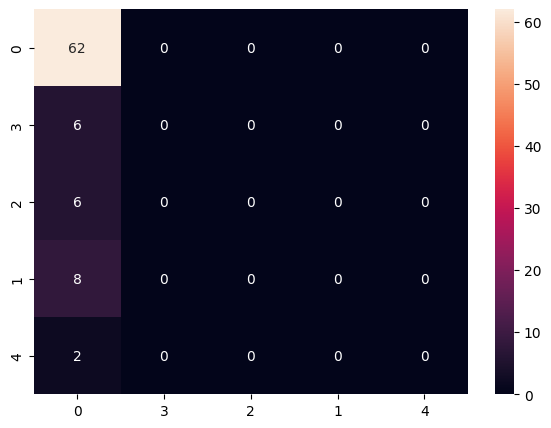

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of SVC Model is as below: \n")
perf_metrics(svc)
print(classification_report(y_test, svc.predict(X_test)))
confusion_mat(svc,y_test)

In [ ]:
#Hypertuning the parameters using Grid Search
svc_params = {'C': [0.1, 1, 10, 100],'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf', 'linear']}
svc_gs = GridSearchCV(SVC(), svc_params,cv=3)

# fit the model on our train set
svc_g_res = svc_gs.fit(X_train, y_train)

#get the best score
svc_g_res.best_score_

0.7395163020163021

In [ ]:
# get the hyperparameters with the best score
svc_g_res.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
# use the best hyperparameters
svc_best = SVC(random_state=1, C =0.1, gamma = 1, kernel = 'rbf')
svc_best.fit(X_train, y_train)

SVC(C=0.1, gamma=1, random_state=1)

The performance metrics of SVC Model Hypertuned is as below: 

Accuracy on training data: 0.7395209580838323
Accuracy on testing data: 0.7380952380952381
Recall on training data: 0.7395209580838323
Recall on testing data: 0.7380952380952381
Precision on training data: 0.5468912474452293
Precision on testing data: 0.5447845804988662
F1 score on training data: 0.6287837406082842
F1 score on testing data: 0.6268754076973255
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



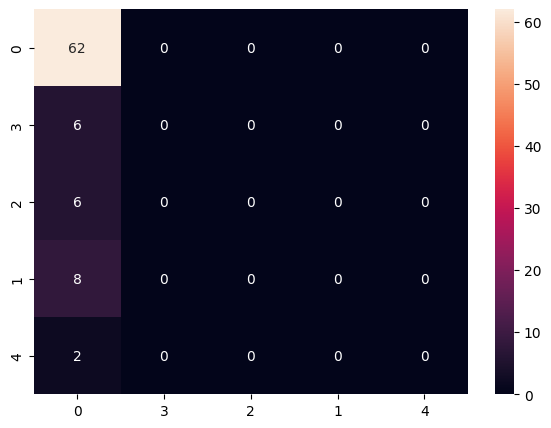

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of SVC Model Hypertuned is as below: \n")
perf_metrics(svc_best)
print(classification_report(y_test, svc_best.predict(X_test)))
confusion_mat(svc_best,y_test)

In [ ]:
# use the best hyperparameters
svc_best_smote = SVC(random_state=1, C =0.1, gamma = 1, kernel = 'rbf')
svc_best_smote.fit(X_train_smote, y_train_smote)

SVC(C=0.1, gamma=1, random_state=1)

The performance metrics of SVC Model Hypertuned is as below: 

Accuracy on training data: 0.9053398058252428
Accuracy on testing data: 0.8673139158576052
Recall on training data: 0.9053398058252428
Recall on testing data: 0.8673139158576052
Precision on training data: 0.9338082723096631
Precision on testing data: 0.9201307066327333
F1 score on training data: 0.9095625511418425
F1 score on testing data: 0.8743014898346192
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        62
           1       1.00      0.67      0.80        61
           2       1.00      0.82      0.90        62
           3       1.00      0.84      0.91        62
           4       1.00      1.00      1.00        62

    accuracy                           0.87       309
   macro avg       0.92      0.87      0.87       309
weighted avg       0.92      0.87      0.87       309



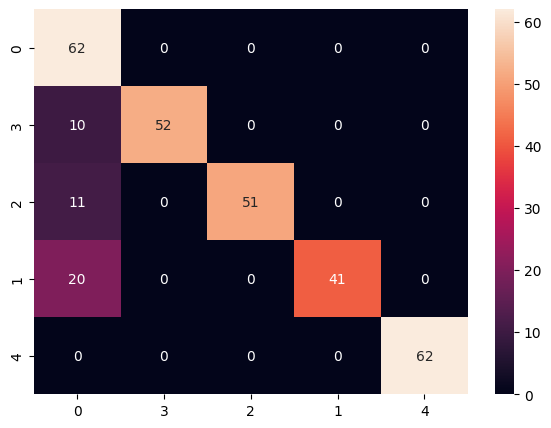

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of SVC Model Hypertuned is as below: \n")
perf_metrics_smote(svc_best_smote)
print(classification_report(y_test_smote, svc_best_smote.predict(X_test_smote)))
confusion_mat_smote(svc_best_smote,y_test_smote)

In [ ]:
#AdaBoost
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

The performance metrics of AdaBoost is as below: 

Accuracy on training data: 0.7604790419161677
Accuracy on testing data: 0.7142857142857143
Recall on training data: 0.7604790419161677
Recall on testing data: 0.7142857142857143
Precision on training data: 0.6249101796407186
Precision on testing data: 0.5400696864111498
F1 score on training data: 0.6680185084376701
F1 score on testing data: 0.6150793650793651
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.54      0.71      0.62        84



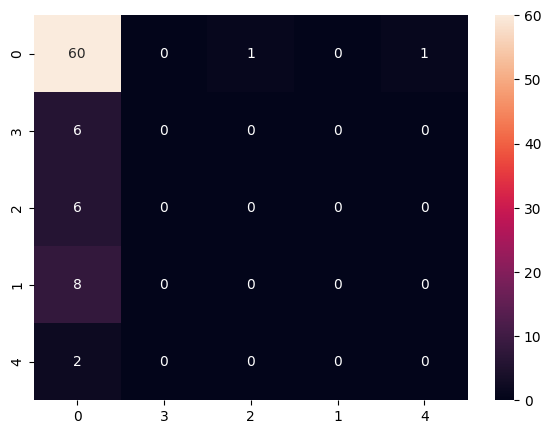

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of AdaBoost is as below: \n")
perf_metrics(ada)
print(classification_report(y_test, ada.predict(X_test)))
confusion_mat(ada,y_test)

In [ ]:
#Hypertuning the parameters using Grid Search

ada_params = {'n_estimators':[50,100,150],'learning_rate':[0.1,0.3,0.5,0.7],
             'algorithm': ['SAMME', 'SAMME.R']}
ada_gs = GridSearchCV(ada, ada_params,cv=5)

# fit the model on our train set
ada_g_res = ada_gs.fit(X_train, y_train)

#get the best score
ada_g_res.best_score_

0.7395296246042514

In [ ]:
# get the hyperparameters with the best score
ada_g_res.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}

In [ ]:
ada_best = AdaBoostClassifier(random_state= 1,learning_rate = 0.1, n_estimators = 50,algorithm = 'SAMME')
ada_best.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, random_state=1)

The performance metrics of AdaBoost Hypertuned is as below: 

Accuracy on training data: 0.7395209580838323
Accuracy on testing data: 0.7380952380952381
Recall on training data: 0.7395209580838323
Recall on testing data: 0.7380952380952381
Precision on training data: 0.5468912474452293
Precision on testing data: 0.5447845804988662
F1 score on training data: 0.6287837406082842
F1 score on testing data: 0.6268754076973255
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.74      0.63        84



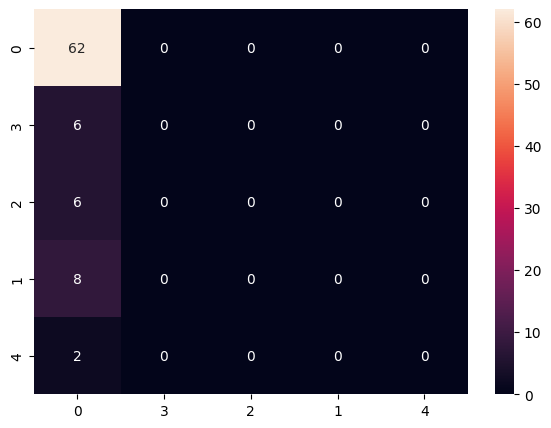

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of AdaBoost Hypertuned is as below: \n")
perf_metrics(ada_best)
print(classification_report(y_test, ada_best.predict(X_test)))
confusion_mat(ada_best,y_test)

In [ ]:
#Use Adaboost classifier
ada_best_smote = AdaBoostClassifier(random_state= 1,learning_rate = 0.1, n_estimators = 50,algorithm = 'SAMME')
ada_best_smote.fit(X_train_smote,y_train_smote)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, random_state=1)

The performance metrics of AdaBoost Hypertuned with SMOTE is as below: 

Accuracy on training data: 0.37783171521035597
Accuracy on testing data: 0.3883495145631068
Recall on training data: 0.37783171521035597
Recall on testing data: 0.3883495145631068
Precision on training data: 0.2822797038618468
Precision on testing data: 0.3146398621669511
F1 score on training data: 0.2684883004455684
F1 score on testing data: 0.2775687096075446
              precision    recall  f1-score   support

           0       0.33      0.02      0.03        62
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        62
           3       0.25      1.00      0.40        62
           4       0.98      0.92      0.95        62

    accuracy                           0.39       309
   macro avg       0.31      0.39      0.28       309
weighted avg       0.31      0.39      0.28       309



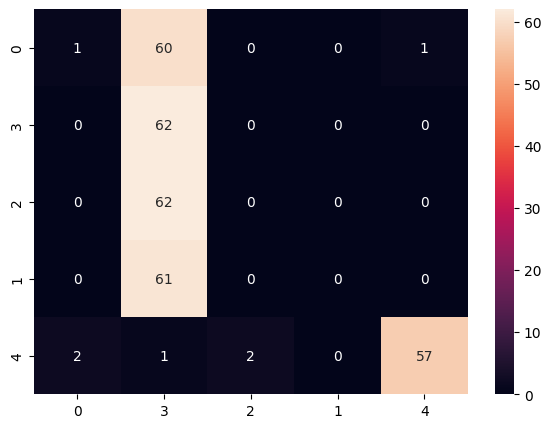

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of AdaBoost Hypertuned with SMOTE is as below: \n")
perf_metrics_smote(ada_best_smote)
print(classification_report(y_test_smote, ada_best_smote.predict(X_test_smote)))
confusion_mat_smote(ada_best_smote,y_test_smote)

In [ ]:
# Gradient Boost
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

The performance metrics of Gradient Boost is as below: 

Accuracy on training data: 0.9970059880239521
Accuracy on testing data: 0.6666666666666666
Recall on training data: 0.9970059880239521
Recall on testing data: 0.6666666666666666
Precision on training data: 0.9970180606528878
Precision on testing data: 0.5955734406438632
F1 score on training data: 0.9969771610872389
F1 score on testing data: 0.6263277240720849
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        62
           1       0.00      0.00      0.00         8
           2       0.33      0.17      0.22         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.67        84
   macro avg       0.22      0.21      0.21        84
weighted avg       0.60      0.67      0.63        84



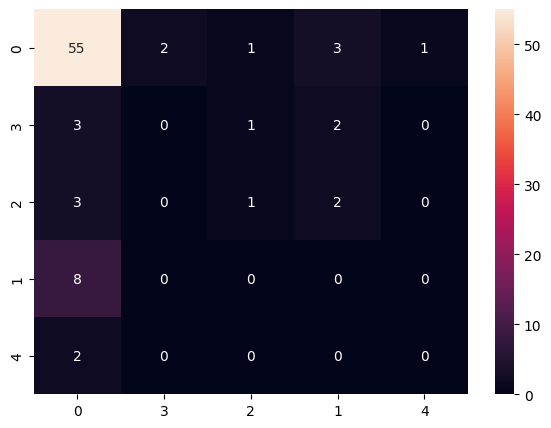

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Gradient Boost is as below: \n")
perf_metrics(gb)
print(classification_report(y_test, gb.predict(X_test)))
confusion_mat(gb,y_test)

In [ ]:
#Hypertuning the parameters using Grid Search

gb_params = {'n_estimators':[50,100,150],'learning_rate':[0.1,0.3,0.5],
            'max_depth':[3,4,5,6]}

gb_gs = GridSearchCV(GradientBoostingClassifier(), gb_params,cv=5)

# fit the model on our train set
gb_g_res = gb_gs.fit(X_train, y_train)

#get the best score
gb_g_res.best_score_

0.7155585707824514

In [ ]:
# get the hyperparameters with the best score
gb_g_res.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [ ]:
# get the hyperparameters with the best score
gb_best = GradientBoostingClassifier(random_state=1,learning_rate = 0.1, max_depth= 5,n_estimators = 50)
gb_best.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=1)

The performance metrics of Gradient Boost hypertuned is as below: 

Accuracy on training data: 0.9970059880239521
Accuracy on testing data: 0.6785714285714286
Recall on training data: 0.9970059880239521
Recall on testing data: 0.6785714285714286
Precision on training data: 0.9970180606528878
Precision on testing data: 0.5978835978835979
F1 score on training data: 0.9969771610872389
F1 score on testing data: 0.632788438758588
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        62
           1       0.00      0.00      0.00         8
           2       0.33      0.17      0.22         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.68        84
   macro avg       0.22      0.21      0.21        84
weighted avg       0.60      0.68      0.63        84



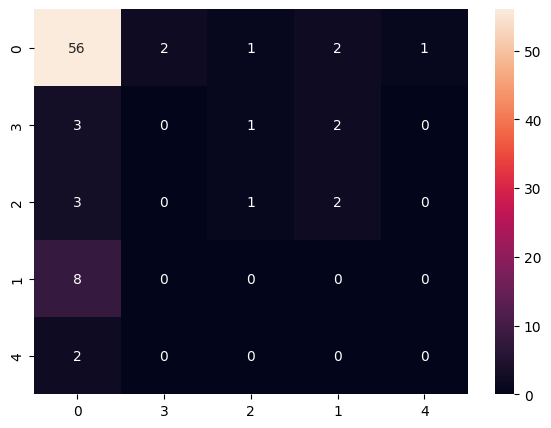

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Gradient Boost hypertuned is as below: \n")
perf_metrics(gb_best)
print(classification_report(y_test, gb_best.predict(X_test)))
confusion_mat(gb_best,y_test)

In [ ]:
# get the hyperparameters with the best score
gb_best_smote = GradientBoostingClassifier(random_state=1,learning_rate = 0.1, max_depth= 5,n_estimators = 50)
gb_best_smote.fit(X_train_smote,y_train_smote)

GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=1)

The performance metrics of Gradient Boost hypertuned is as below: 

Accuracy on training data: 0.9983818770226537
Accuracy on testing data: 0.9449838187702265
Recall on training data: 0.9983818770226537
Recall on testing data: 0.9449838187702265
Precision on training data: 0.9983851262655801
Precision on testing data: 0.9459420134704631
F1 score on training data: 0.9983818704186361
F1 score on testing data: 0.9453406649874082
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        62
           1       0.95      0.95      0.95        61
           2       0.97      0.95      0.96        62
           3       0.95      0.97      0.96        62
           4       1.00      0.97      0.98        62

    accuracy                           0.94       309
   macro avg       0.95      0.95      0.95       309
weighted avg       0.95      0.94      0.95       309



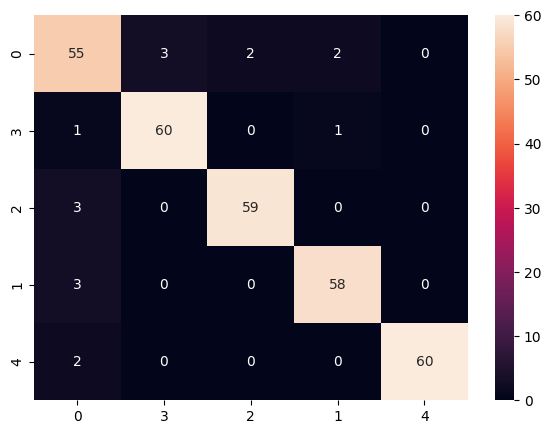

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Gradient Boost hypertuned is as below: \n")
perf_metrics_smote(gb_best_smote)
print(classification_report(y_test_smote, gb_best_smote.predict(X_test_smote)))
confusion_mat_smote(gb_best_smote,y_test_smote)

In [ ]:
#Comparing the performance of each model in train stage and test stage
#defining list of models

models = [dTree,dTree_best,rf,rf_best,svc,svc_best,ada,ada_best,gb,gb_best]

#defining empty lists to add train & test results
accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1score_train = []
f1score_test = []

#looping through all the models
for model in models:
    j= perf_metrics(model,False)
    accuracy_train.append(np.round(j[0],2))
    accuracy_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1score_train.append(np.round(j[6],2))
    f1score_test.append(np.round(j[7],2))

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Model':['Decision Tree with default parameters','Tuned Decision Tree',
                                 'Random Forest with default parameters','Tuned Random Forest',
                                 'SVC with default parameters','Tuned SVC',
                                'AdaBoost with default parameters','Tuned AdaBoost',
                                'GradientBoost with default parameters','Tuned GradientBoost'],
                         'Train accuracy': accuracy_train, 'Test accuracy': accuracy_test,
                         'Train recall': recall_train, 'Test recall': recall_test,
                         'Train precision': precision_train, 'Test precision': precision_test,
                         'Train F1 Score': f1score_train, 'Test F1 Score': f1score_test})
results

,Model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train F1 Score,Test F1 Score
0,Decision Tree with default parameters,0.78,0.70,0.78,0.70,0.69,0.54,0.72,0.61
1,Tuned Decision Tree,0.77,0.70,0.77,0.70,0.71,0.54,0.69,0.61
2,Random Forest with default parameters,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63
3,Tuned Random Forest,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63
4,SVC with default parameters,0.78,0.74,0.78,0.74,0.81,0.54,0.70,0.63
5,Tuned SVC,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63
6,AdaBoost with default parameters,0.76,0.71,0.76,0.71,0.62,0.54,0.67,0.62
7,Tuned AdaBoost,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63
8,GradientBoost with default parameters,1.00,0.67,1.00,0.67,1.00,0.60,1.00,0.63
9,Tuned GradientBoost,1.00,0.68,1.00,0.68,1.00,0.60,1.00,0.63


In [ ]:
#Comparing the performance of each model in train stage and test stage
#defining list of models

models_smote = [dTree_best_smote,rf_best_smote,svc_best_smote,ada_best_smote,gb_best_smote]

#defining empty lists to add train & test results
accuracy_train_smote = []
accuracy_test_smote = []
recall_train_smote = []
recall_test_smote = []
precision_train_smote = []
precision_test_smote = []
f1score_train_smote = []
f1score_test_smote = []

#looping through all the models
for model_1 in models_smote:
    j= perf_metrics_smote(model_1,False)
    accuracy_train_smote.append(np.round(j[0],2))
    accuracy_test_smote.append(np.round(j[1],2))
    recall_train_smote.append(np.round(j[2],2))
    recall_test_smote.append(np.round(j[3],2))
    precision_train_smote.append(np.round(j[4],2))
    precision_test_smote.append(np.round(j[5],2))
    f1score_train_smote.append(np.round(j[6],2))
    f1score_test_smote.append(np.round(j[7],2))

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_smote = pd.DataFrame({'Model':['Tuned Decision Tree with SMOTE',
                                 'Tuned Random Forest with SMOTE',
                                 'Tuned SVC with SMOTE',
                                 'Tuned AdaBoost with SMOTE',
                                 'Tuned GradientBoost with SMOTE'],
                         'Train accuracy': accuracy_train_smote, 'Test accuracy': accuracy_test_smote,
                         'Train recall': recall_train_smote, 'Test recall': recall_test_smote,
                         'Train precision': precision_train_smote, 'Test precision': precision_test_smote,
                         'Train F1 Score': f1score_train_smote, 'Test F1 Score': f1score_test_smote})

In [ ]:
results_smote

,Model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train F1 Score,Test F1 Score
0,Tuned Decision Tree with SMOTE,0.43,0.41,0.43,0.41,0.65,0.63,0.36,0.33
1,Tuned Random Forest with SMOTE,0.85,0.85,0.85,0.85,0.87,0.86,0.86,0.85
2,Tuned SVC with SMOTE,0.91,0.87,0.91,0.87,0.93,0.92,0.91,0.87
3,Tuned AdaBoost with SMOTE,0.38,0.39,0.38,0.39,0.28,0.31,0.27,0.28
4,Tuned GradientBoost with SMOTE,1.00,0.94,1.00,0.94,1.00,0.95,1.00,0.95


In [ ]:
results_df = pd.concat([results,results_smote]).reset_index(drop=True)
results_df

,Model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train F1 Score,Test F1 Score
0,Decision Tree with default parameters,0.78,0.70,0.78,0.70,0.69,0.54,0.72,0.61
1,Tuned Decision Tree,0.77,0.70,0.77,0.70,0.71,0.54,0.69,0.61
2,Random Forest with default parameters,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63
3,Tuned Random Forest,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63
4,SVC with default parameters,0.78,0.74,0.78,0.74,0.81,0.54,0.70,0.63
5,Tuned SVC,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63
6,AdaBoost with default parameters,0.76,0.71,0.76,0.71,0.62,0.54,0.67,0.62
7,Tuned AdaBoost,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63
8,GradientBoost with default parameters,1.00,0.67,1.00,0.67,1.00,0.60,1.00,0.63
9,Tuned GradientBoost,1.00,0.68,1.00,0.68,1.00,0.60,1.00,0.63


<font color="green"><strong>
 <h3>Conclusion<h3>
</font>

<font color="Green"><strong>
Interim Report Submission: Final Conclusions
###1.   **Objective**: This use case aimed to classify description text data into five distinct accident severity levels: [I, II, III, IV, V]. A dataset comprising 425 records was utilized for model development. An extensive data analysis was conducted on all columns of the dataset.

### 2.  **Data Processing:** Various text processing techniques were employed to clean the raw text data, ensuring the dataset was suitable for modeling.

###3.   **Model Development:** The cleaned dataset was divided into training and testing subsets and processed using multiple algorithms, including Decision Tree, Support Vector Machine, Random Forest, AdaBoost, and Gradient Boosting. A comparative analysis of the classification reports was conducted for these models. All models were fine tuned by Grid Search CV method

###4.   **Performance Evaluation:** The Gradient Boosting algorithm demonstrated superior performance relative to the other algorithms.

###5.   **Initial Results:** The initial model yielded a classification accuracy of 68%, a recall of 68%, a precision of 60%, and an F1-score of 63%.

###6.   **Detailed Findings:** The model exhibited strong performance in identifying Accident Level -I and III, Other accident levels were less but demonstrated limitations in distinguishing between [II, IV, V].

###7.   **Bias Mitigation:** To address the class imbalance in the original dataset (bias towards class I), oversampling techniques were employed, and the same set of models was reevaluated.


###8.   **Improved Results:** Following the application of oversampling, the model achieved a classification accuracy, recall, precision, and F1-score of 95%.


###9.   **Enhanced Findings:** The enhanced model demonstrated robust performance in identifying Accident Levels III and V. However, it still faced challenges in distinguishing between Levels I, III, and IV, with some misclassifications persisting, particularly with the Gradient Boosting model using SMOTE.





###10 **Recommendations** Given the original dataset's focus on accident level classification, it is imperative to improve precision, recall, and the F1 score. To enhance model performance, the following strategies are recommended:
-Incorporating advanced text preprocessing techniques.
-Exploring additional ensemble methods.

###11 **Future Inference**
The organization should prioritize efforts to reduce the incidence of severe accidents, specifically those classified under severity levels IV and V.

</font>

**Milestone 2:**

Step 1: Design, train and test Neural networks classifiers

In [ ]:
#Import necessary packages
import tensorflow
from sklearn import preprocessing
import h5py
#import keras packages.
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers,losses
from keras.layers import Embedding,Flatten,Dense,Dropout,BatchNormalization,Conv1D,MaxPooling1D,SimpleRNN,LSTM
from keras.utils import to_categorical

In [ ]:
# Transforming Labels into format acceptable by Neural Network
# Convert to "one-hot" vectors using to_categorical function
# num of classes = 5
y_train_formatted = to_categorical(y_train_smote, 5)
y_test_formatted = to_categorical(y_test_smote,5)

#Converting X_train_smote & X_test_smote to numpy arrays
X_train_converted= X_train_smote.to_numpy()
X_test_converted= X_test_smote.to_numpy()

In [ ]:
print("X train:",X_train_converted.shape)
print("y train:",y_train_formatted.shape)
print("X test:",X_test_converted.shape)
print("y test:",y_test_formatted.shape)

X train: (1236, 3083)
y train: (1236, 5)
X test: (309, 3083)
y test: (309, 5)


In [ ]:
#basic NN model
#naive nlp without alterations
def basic_NN(xtrain):
  model=Sequential()
  model.add(Dense(500,input_dim=xtrain.shape[1],activation='sigmoid'))
  model.add(Dense(250,activation='sigmoid'))
  model.add(Dense(100,activation='sigmoid'))
  model.add(Dense(50,activation='sigmoid'))
  model.add(Dense(25,activation='sigmoid'))
  model.add(Dense(5,activation='softmax'))
  sgd = optimizers.SGD(learning_rate = 0.01)
  model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
modelbasicnn=basic_NN(X_train_converted)
modelbasicnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │       1,542,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,698,805 (6.48 MB)

 Trainable params: 1,698,805 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#fit the modelbasicnn model using X_train_smote and y_train_smote
historybasicnn=modelbasicnn.fit(X_train_converted,y_train_formatted,validation_data=(X_test_converted,y_test_formatted),epochs=10,batch_size=100)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.1977 - loss: 1.8646 - val_accuracy: 0.1974 - val_loss: 1.8041
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2058 - loss: 1.7860 - val_accuracy: 0.1974 - val_loss: 1.7423
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2066 - loss: 1.7264 - val_accuracy: 0.1974 - val_loss: 1.7003
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1997 - loss: 1.6888 - val_accuracy: 0.1974 - val_loss: 1.6701
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1854 - loss: 1.6673 - val_accuracy: 0.1974 - val_loss: 1.6507
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1985 - loss: 1.6477 - val_accuracy: 0.1974 - val_loss: 1.6373
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1935 - loss: 1.6436 - val_accuracy: 0.1974 - val_loss: 1.6280
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1926 - loss: 1.6271 - val_accuracy: 0.1974 - v

In [ ]:
#evaluate the basic Neural Network
resultsbasicnn = modelbasicnn.evaluate(X_test_converted, y_test_formatted)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1884 - loss: 1.6133


In [ ]:
print('Test accuracy: ', resultsbasicnn[1])

Test accuracy:  0.19741100072860718


**Inference:**

The designed neural network is a basic version with sigmoid activation input function with poor accuracy of 20%.Lets try weight initialization and check for improvement.

**Train Neural Network using various techniques:**

change activation as relu with weight initialization

In [ ]:
#define a function with relu input activation
def mlp_model_relu():
    model = Sequential()
    model.add(Dense(2000,input_dim=X_train_converted.shape[1],activation='relu'))
    model.add(Dense(1000,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(500,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(500,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(250,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(50,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(25,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
    num_classes = y_train_formatted.shape[1]
    model.add(Dense(num_classes,activation='softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
#initiate the model
mlprelu=mlp_model_relu()
mlprelu.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 2000)                │       6,168,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1000)                │       2,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,097,190 (34.70 MB)

 Trainable params: 9,097,190 (34.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Execute the model
hitoryrelu=mlprelu.fit(X_train_converted,y_train_formatted,validation_data =(X_test_converted,y_test_formatted),epochs=50,batch_size=100)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.2525 - loss: 1.6099 - val_accuracy: 0.2589 - val_loss: 1.6096
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.2361 - loss: 1.6097 - val_accuracy: 0.2589 - val_loss: 1.6093
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.2457 - loss: 1.6091 - val_accuracy: 0.2621 - val_loss: 1.6091
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.2457 - loss: 1.6091 - val_accuracy: 0.2686 - val_loss: 1.6089
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.2567 - loss: 1.6088 - val_accuracy: 0.2686 - val_loss: 1.6086
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.2467 - loss: 1.6087 - val_accuracy: 0.2718 - val_loss: 1.6084
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.2475 - loss: 1.6087 - val_accuracy: 0.2686 - val_loss: 1.6082
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.2774 - loss: 1.6073 - val_accuracy: 0.

In [ ]:
resultsrelu = mlprelu.evaluate(X_test_converted, y_test_formatted)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3162 - loss: 1.5896


In [ ]:
print('Test accuracy: ', resultsrelu[1])

Test accuracy:  0.291262149810791


**Inference:**

1.The designed neural network with relu activation function shows improvement and its accuracy is 40%.we can further improve the performance using batchnormalization and dropout.

**3. Batch Normalization**

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

Normalize each mini-batch before nonlinearity

also used weight initialization

In [ ]:
#add batchnormalization
def relu_batchnormalization():
    model = Sequential()
    model.add(Dense(2000,input_dim=X_train_converted.shape[1],activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1000,activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(500,activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(500,activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(250,activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(25,activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))

    model.add(Dense(5,activation='softmax'))

    sgd = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
mlprelubatchnormal=relu_batchnormalization()
mlprelubatchnormal.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 2000)                │       6,168,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2000)                │           8,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1000)                │       2,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1000)                │           4,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 500)                 │           2,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 500)                 │           2,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 250)                 │           1,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,115,690 (34.77 MB)

 Trainable params: 9,106,440 (34.74 MB)

 Non-trainable params: 9,250 (36.13 KB)

In [ ]:
historyrelubatchnormal=mlprelubatchnormal.fit(X_train_converted,y_train_formatted,validation_data=(X_test_converted,y_test_formatted),epochs=100,batch_size=30)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.2116 - loss: 1.9399 - val_accuracy: 0.2006 - val_loss: 1.6300
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.2129 - loss: 1.9510 - val_accuracy: 0.2006 - val_loss: 1.6496
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.2159 - loss: 1.8839 - val_accuracy: 0.2006 - val_loss: 1.6675
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.1973 - loss: 1.8352 - val_accuracy: 0.1974 - val_loss: 1.6936
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.2164 - loss: 1.8153 - val_accuracy: 0.2039 - val_loss: 1.7104
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.2047 - loss: 1.9104 - val_accuracy: 0.2006 - val_loss: 1.7140
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.2177 - loss: 1.8411 - val_accuracy: 0.2006 - val_loss: 1.7052
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.2346 - loss: 1.7666 - val_accuracy: 0.

In [ ]:
#evaluate batchnormalization with 100 epochs
resultsrelubatch = mlprelubatchnormal.evaluate(X_test_converted, y_test_formatted)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6992 - loss: 0.8630


In [ ]:
print("Test accuracy :",resultsrelubatch[1])

Test accuracy : 0.6699029207229614


Inferences:

1.A Neural Network trained with batchnormalization ,relu activation,SGD optimizer with learning rate 0.001,loss function with categorical cross entropy and with 100 epochs we are able to achieve accuracy 67%.Lets try with adam optimizer.

In [ ]:
#model trained with adam optimizer
def adamNN():
  NN_model = Sequential()

# Input layer
  NN_model.add(Dense(512, input_dim=X_train_converted.shape[1], activation='relu'))

# Hidden layers
  NN_model.add(Dense(256, activation='relu'))
  NN_model.add(Dense(128, activation='relu'))

# Output layer for multi-class classification
  num_classes = y_train_formatted.shape[1]
  NN_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
  NN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return NN_model

In [ ]:
# Train the model
adammodel=adamNN()
history_1= adammodel.fit(X_train_converted, y_train_formatted, validation_split=0.3, epochs=20, batch_size=32)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5369 - loss: 1.4158 - val_accuracy: 0.9919 - val_loss: 0.2260
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9919 - loss: 0.1267 - val_accuracy: 0.9946 - val_loss: 0.0178
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy: 1.0000 - val_loss: 0.0150
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9944 - loss: 0.0206 - val_accuracy: 0.9704 - val_loss: 0.0970
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9976 - loss: 0.0268 - val_accuracy: 1.0000 - val_loss: 0.0111
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9980 - loss: 0.0108 - val_accuracy: 0.9973 - val_loss: 0.0147
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9956 - loss: 0.0139 - val_accuracy: 0.9946 - val_loss: 0.0178
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9931 - loss: 0.0142 - val_accuracy: 0.9865 - v

In [ ]:
# Evaluate the model
trainloss,trainaccuracy=adammodel.evaluate(X_train_converted,y_train_formatted)
loss, accuracy = adammodel.evaluate(X_test_converted, y_test_formatted)
print(f'Train Accuracy: {trainaccuracy} Test Accuracy: {accuracy}')

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9957 - loss: 0.0116
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9778 - loss: 0.0586 
Train Accuracy: 0.9943365454673767 Test Accuracy: 0.9708737730979919


In [ ]:
#function to plot the graph for accuracy and loss for train and validation
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  if string=='loss':
    plt.title("Training and Validation Loss")
  else:
    plt.title("Training and Validation Accuracy")
  plt.show()

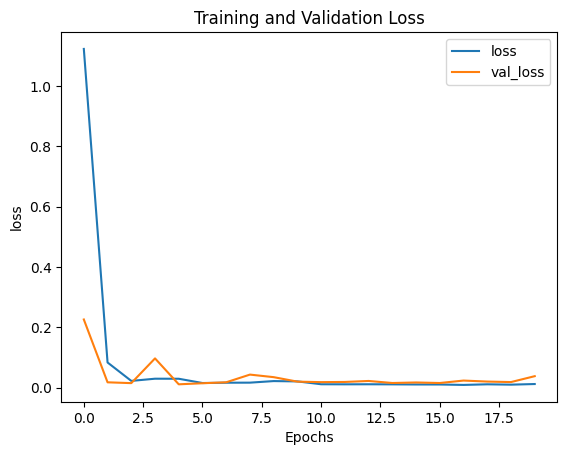

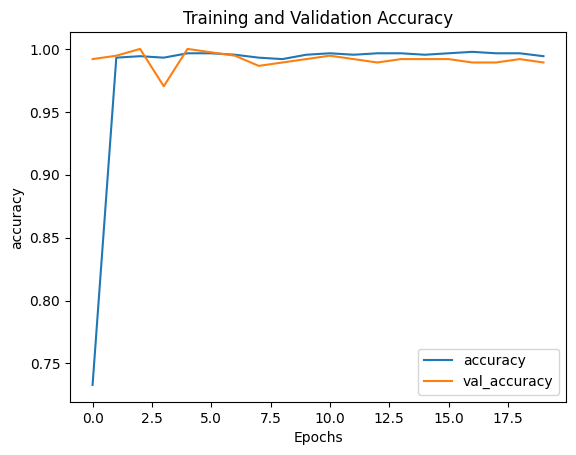

In [ ]:
#plot training and validation loss and accuracy graph
plot_graphs(history_1,"loss")
plot_graphs(history_1,"accuracy")

Loss is reducing & Accuracy is increased in Neural network with adam optimizer model.

In [ ]:
# Convert predictions to class labels
y_train_encoded = np.argmax(y_train_formatted, axis=1)
y_test_encoded = np.argmax(y_test_formatted, axis=1)

#create function to predict & print performnace metrics for Neural networks

def perf_metrics_NN(model,flag=True):
    score_list = []

    #make prediction on train & test
    pred_train_NN= model.predict(X_train_converted)
    pred_test_NN= model.predict(X_test_converted)

    pred_train_NN = np.argmax(pred_train_NN, axis=1)
    pred_test_NN = np.argmax(pred_test_NN, axis=1)

    #calculate accuracy on train & test
    train_acc_NN= accuracy_score(y_train_encoded,pred_train_NN)
    test_acc_NN= accuracy_score(y_test_encoded,pred_test_NN)

    #calculate recall on train & test
    train_rec_NN= recall_score(y_train_encoded,pred_train_NN, average='weighted')
    test_rec_NN= recall_score(y_test_encoded,pred_test_NN, average='weighted')

    #calculate precision on train & test
    train_pre_NN= precision_score(y_train_encoded,pred_train_NN,average='weighted')
    test_pre_NN= precision_score(y_test_encoded,pred_test_NN,average='weighted')

    #calculate F1 score on train & test
    train_F1_NN= f1_score(y_train_encoded,pred_train_NN,average='weighted')
    test_F1_NN= f1_score(y_test_encoded,pred_test_NN,average='weighted')

    score_list.extend((train_acc_NN,test_acc_NN,train_rec_NN,test_rec_NN,train_pre_NN,test_pre_NN,train_F1_NN,test_F1_NN))

    if flag==True:
        print('Accuracy on training data:', accuracy_score(y_train_encoded,pred_train_NN))
        print('Accuracy on testing data:', accuracy_score(y_test_encoded,pred_test_NN))
        print('Recall on training data:', recall_score(y_train_encoded,pred_train_NN,average='weighted'))
        print('Recall on testing data:', recall_score(y_test_encoded,pred_test_NN,average='weighted'))
        print('Precision on training data:', precision_score(y_train_encoded,pred_train_NN,average='weighted'))
        print('Precision on testing data:', precision_score(y_test_encoded,pred_test_NN,average='weighted'))
        print('F1 score on training data:', f1_score(y_train_encoded,pred_train_NN,average='weighted'))
        print('F1 score on testing data:', f1_score(y_test_encoded,pred_test_NN,average='weighted'))

    return score_list

def classification_report_NN(model):
    pred_test_NN= model.predict(X_test_converted)
    pred_test_NN = np.argmax(pred_test_NN, axis=1)
    print(classification_report(y_test_encoded, pred_test_NN))

def confusion_mat_NN(model,y_test_encoded,labels=[0, 3, 2, 1, 4]):
    pred_test_NN= model.predict(X_test_converted)
    pred_test_NN = np.argmax(pred_test_NN, axis=1)
    cm=confusion_matrix(y_test_encoded, pred_test_NN, labels=[0, 3, 2, 1, 4])
    df_cm = pd.DataFrame(cm, index = [i for i in [0, 3, 2, 1, 4]],columns = [i for i in [0, 3, 2, 1, 4]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')

The performance metrics of Basic Neural network is as below: 

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy on training data: 0.9943365695792881
Accuracy on testing data: 0.970873786407767
Recall on training data: 0.9943365695792881
Recall on testing data: 0.970873786407767
Precision on training data: 0.9944172694335925
Precision on testing data: 0.9719985516102021
F1 score on training data: 0.994336297947674
F1 score on testing data: 0.970630192689191
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        62
           1       0.97      0.95      0.96        61
           2       0.95      1.00      0.98        62
           3       0.94      1.00      0.97        62
           4       1.00      1.00      1.00        62

    accuracy                           0.97       309
   macro avg       0.97      0.97      0.97       309
weighted avg       0.97    

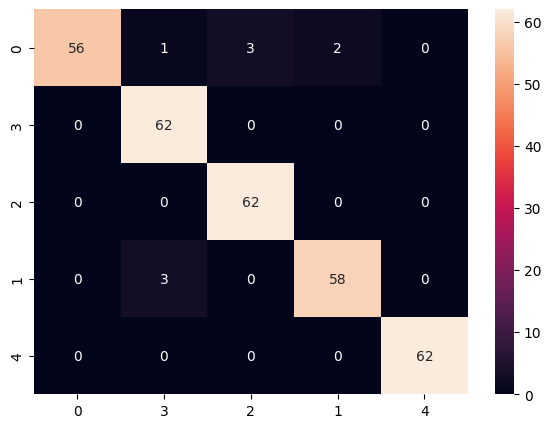

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Basic Neural network is as below: \n")
perf_metrics_NN(adammodel)
classification_report_NN(adammodel)
confusion_mat_NN(adammodel,y_test_encoded)

Inference:

1.A Neural Network trained with adam optimizer shows good performance of 99 percentage at train and 98 percentage at test level.

2.Train and test loss also have reduced and it is consistent from third epoch.The loss is reduced to 0 at epoch 20.

3.Train and test accuracy also shows consitent improvement from third epoch.

4.from the confusion matrix the overal weighted average of accuracy is 98% ,precision,recall and f1-score at all levels are balanced.

**Design and Train RNN**

In [ ]:
# Reshape the data to make it usable for RNN/LSTM models
X_train_reshaped = X_train_converted.reshape((X_train_converted.shape[0], 1, X_train_converted.shape[1]))
X_test_reshaped = X_test_converted.reshape((X_test_converted.shape[0], 1, X_test_converted.shape[1]))

In [ ]:
#Define basic RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(100, activation='relu', input_shape=(1, 3083), return_sequences=True))
rnn_model.add(SimpleRNN(50, activation='relu'))
rnn_model.add(Dense(5, activation='softmax'))

In [ ]:
# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_3= rnn_model.fit(X_train_reshaped, y_train_formatted, validation_split=0.3,epochs=20, batch_size=32, verbose=1)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4627 - loss: 1.5539 - val_accuracy: 0.7655 - val_loss: 1.2119
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8098 - loss: 1.0325 - val_accuracy: 0.9245 - val_loss: 0.6246
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9840 - loss: 0.4865 - val_accuracy: 0.9838 - val_loss: 0.2509
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9954 - loss: 0.1488 - val_accuracy: 0.9946 - val_loss: 0.1129
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9967 - loss: 0.0569 - val_accuracy: 0.9946 - val_loss: 0.0728
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9964 - loss: 0.0326 - val_accuracy: 0.9946 - val_loss: 0.0559
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9980 - loss: 0.0231 - val_accuracy: 0.9919 - val_loss: 0.0500
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9970 - loss: 0.0197 - val_accuracy: 0.9946 - val_los

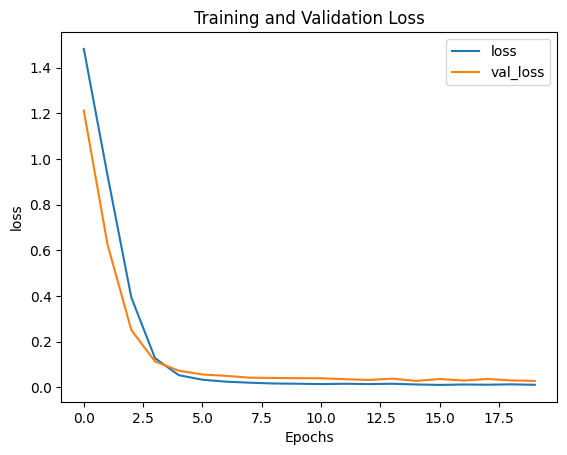

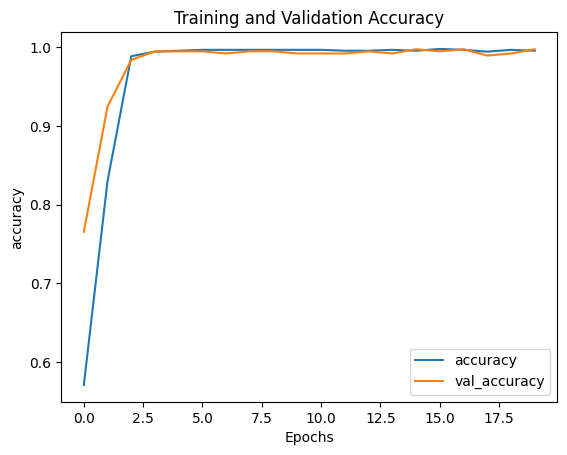

In [ ]:
#Plot simple RNN model
plot_graphs(history_3,"loss")
plot_graphs(history_3,"accuracy")

**Inference:**

1.The plot conveys loss is reduced drastically at the third epoch.

2.Accuracy has reached 96% at train level and 99% at test level in the third epoch itself.

3.Train and Test loss are closer to (0.05) and accuracy reached 99% at ttrain level and 100% at test level at epoch 5 itself.

4.this model with less error and high performance without overfitting is a recommended model.


In [ ]:
# Evaluate the model
trainloss,trainaccuracy=rnn_model.evaluate(X_train_reshaped,y_train_formatted)
loss, accuracy = rnn_model.evaluate(X_test_reshaped, y_test_formatted)
print(f'Train Accuracy: {trainaccuracy} , Test Accuracy: {accuracy}')

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9967 - loss: 0.0086
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9936 - loss: 0.0372 
Train Accuracy: 0.9975728392601013 , Test Accuracy: 0.9935275316238403


In [ ]:
#create function to predict & print performnace metrics for RNN/LSTM

def perf_metrics_RNN(model,flag=True):

    score_list = []


    #make prediction on train & test
    pred_train= model.predict(X_train_reshaped)
    pred_test= model.predict(X_test_reshaped)

    pred_train_NN = np.argmax(pred_train, axis=1)
    pred_test_NN = np.argmax(pred_test, axis=1)



    #calculate accuracy on train & test
    train_acc_NN= accuracy_score(y_train_encoded,pred_train_NN)
    test_acc_NN= accuracy_score(y_test_encoded,pred_test_NN)

    #calculate recall on train & test
    train_rec_NN= recall_score(y_train_encoded,pred_train_NN, average='weighted')
    test_rec_NN= recall_score(y_test_encoded,pred_test_NN, average='weighted')

    #calculate precision on train & test
    train_pre_NN= precision_score(y_train_encoded,pred_train_NN,average='weighted')
    test_pre_NN= precision_score(y_test_encoded,pred_test_NN,average='weighted')

    #calculate F1 score on train & test
    train_F1_NN= f1_score(y_train_encoded,pred_train_NN,average='weighted')
    test_F1_NN= f1_score(y_test_encoded,pred_test_NN,average='weighted')

    score_list.extend((train_acc_NN,test_acc_NN,train_rec_NN,test_rec_NN,train_pre_NN,test_pre_NN,train_F1_NN,test_F1_NN))


    if flag==True:
        print('Accuracy on training data:', accuracy_score(y_train_encoded,pred_train_NN))
        print('Accuracy on testing data:', accuracy_score(y_test_encoded,pred_test_NN))
        print('Recall on training data:', recall_score(y_train_encoded,pred_train_NN,average='weighted'))
        print('Recall on testing data:', recall_score(y_test_encoded,pred_test_NN,average='weighted'))
        print('Precision on training data:', precision_score(y_train_encoded,pred_train_NN,average='weighted'))
        print('Precision on testing data:', precision_score(y_test_encoded,pred_test_NN,average='weighted'))
        print('F1 score on training data:', f1_score(y_train_encoded,pred_train_NN,average='weighted'))
        print('F1 score on testing data:', f1_score(y_test_encoded,pred_test_NN,average='weighted'))

    return score_list

def classification_report_RNN(model):
    pred_test_NN= model.predict(X_test_reshaped)
    pred_test_NN = np.argmax(pred_test_NN, axis=1)
    print(classification_report(y_test_encoded, pred_test_NN))

def confusion_mat_RNN(model,y_test_encoded,labels=[0, 3, 2, 1, 4]):
    pred_test_NN= model.predict(X_test_reshaped)
    pred_test_NN = np.argmax(pred_test_NN, axis=1)
    cm=confusion_matrix(y_test_encoded, pred_test_NN, labels=[0, 3, 2, 1, 4])
    df_cm = pd.DataFrame(cm, index = [i for i in [0, 3, 2, 1, 4]],columns = [i for i in [0, 3, 2, 1, 4]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')

The performance metrics of Basic Recurrent Neural network is as below: 

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy on training data: 0.9975728155339806
Accuracy on testing data: 0.9935275080906149
Recall on training data: 0.9975728155339806
Recall on testing data: 0.9935275080906149
Precision on training data: 0.9975858125056862
Precision on testing data: 0.9937329840242461
F1 score on training data: 0.9975727890108528
F1 score on testing data: 0.9935266523936411
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        62
           4       1.00      1.00      1.00        62

    accuracy                           0.99       309
   macro avg       0.99      0.99      0.99       309
weighted avg

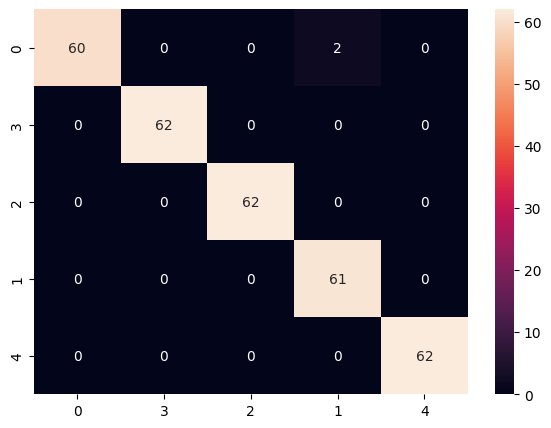

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Basic Recurrent Neural network is as below: \n")
perf_metrics_RNN(rnn_model)
classification_report_RNN(rnn_model)
confusion_mat_RNN(rnn_model,y_test_encoded)

Here, with Basic RNN model, the performance is quite good with testing accuracy as 99% and precision, recall, F1 score are also above or equal to 97%.

**Tuned RNN**

In [ ]:
#Define RNN model with Batch Normalization and Dropout
tuned_rnn_model = Sequential()


tuned_rnn_model.add(SimpleRNN(100, activation='relu', input_shape=(1, 3083), return_sequences=True))
tuned_rnn_model.add(BatchNormalization())
tuned_rnn_model.add(Dropout(0.2))

tuned_rnn_model.add(SimpleRNN(50, activation='relu'))
tuned_rnn_model.add(BatchNormalization())
tuned_rnn_model.add(Dropout(0.2))

tuned_rnn_model.add(Dense(5, activation='softmax'))

In [ ]:
# Compile the model
tuned_rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_4 = tuned_rnn_model.fit(X_train_reshaped, y_train_formatted,validation_split=0.3, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5260 - loss: 1.3617 - val_accuracy: 0.8113 - val_loss: 1.5312
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9579 - loss: 0.2088 - val_accuracy: 0.6981 - val_loss: 1.4681
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9904 - loss: 0.0954 - val_accuracy: 0.6415 - val_loss: 1.4045
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9945 - loss: 0.0544 - val_accuracy: 0.6173 - val_loss: 1.3444
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9959 - loss: 0.0448 - val_accuracy: 0.6119 - val_loss: 1.2828
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9928 - loss: 0.0573 - val_accuracy: 0.6199 - val_loss: 1.2142
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9936 - loss: 0.0325 - val_accuracy: 0.6442 - val_loss: 1.1373
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9989 - loss: 0.0242 - val_accuracy: 0.6765 - val_

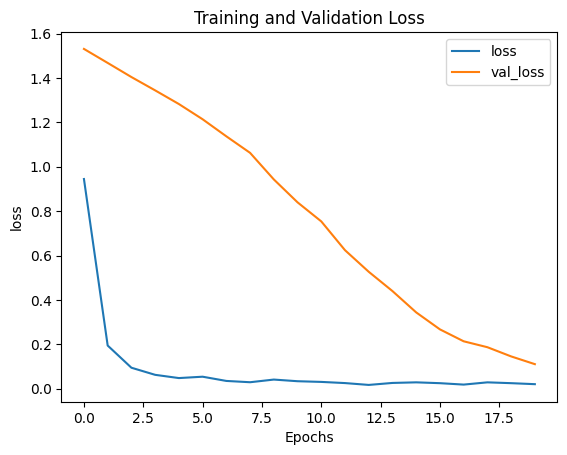

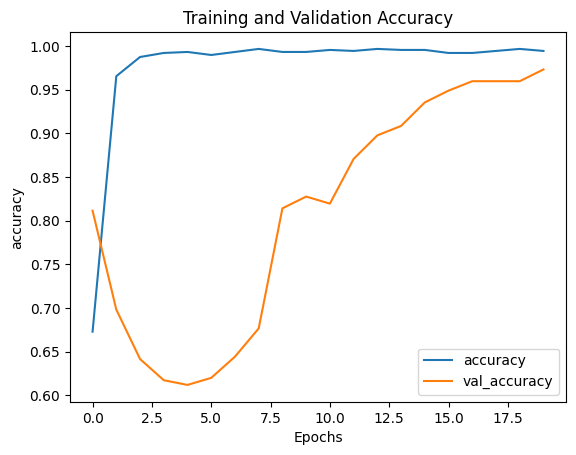

In [ ]:
plot_graphs(history_4,"loss")
plot_graphs(history_4,"accuracy")

In [ ]:
# Evaluate the model
loss, accuracy = tuned_rnn_model.evaluate(X_test_reshaped, y_test_formatted)
print(f'Test Accuracy: {accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9573 - loss: 0.1402 
Test Accuracy: 0.9579287767410278


The performance metrics of Tuned Recurrent Neural network is as below: 

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy on training data: 0.9894822006472492
Accuracy on testing data: 0.9579288025889967
Recall on training data: 0.9894822006472492
Recall on testing data: 0.9579288025889967
Precision on training data: 0.9897078343253761
Precision on testing data: 0.9614013458673651
F1 score on training data: 0.9894534328929625
F1 score on testing data: 0.9575027310039754
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        62
           1       0.92      0.95      0.94        61
           2       1.00      1.00      1.00        62
           3       0.89      1.00      0.94        62
           4       1.00      1.00      1.00        62

    accuracy                           0.96       309
   macro avg       0.96      0.96      0.96       309
weighted avg

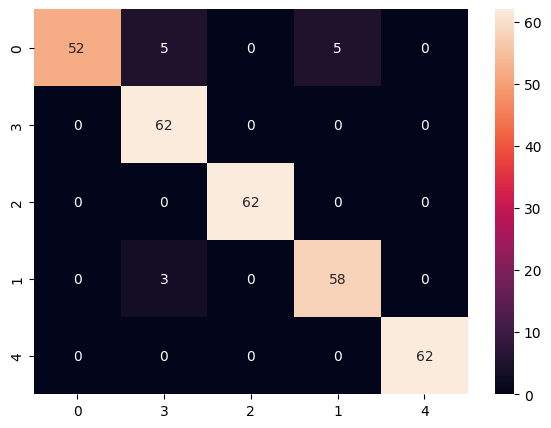

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Tuned Recurrent Neural network is as below: \n")
perf_metrics_RNN(tuned_rnn_model)
classification_report_RNN(tuned_rnn_model)
confusion_mat_RNN(tuned_rnn_model,y_test_encoded)

**Inference:**

Tuned RNN also gives good result but quite less than Basic RNN. The test accuracy is around 96%. Precision, recall & f1 score is also comparatively less than Basic RNN but still the model performance is quite good.

**Design and Train LSTM Classifier.**

**Long Short Term Memory (LSTM)** is a special kind of Recurrent Neural Network (RNN), capable of learning long-term dependencies. These long-term dependencies have a great influence on the meaning and overall polarity of a document. Long short-term memory networks (LSTM) address this long-term dependency problem by introducing a memory into the network.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

#initialize topwords,maxtextlength,embedding vector length
# load the dataset but only keep the top n words, zero the rest
top_words = 5000

# truncate and pad input sequences
X_train_list = X_train.values.tolist()
X_test_list = X_test.values.tolist()
max_text_length = 500
X_train_lst = sequence.pad_sequences(X_train_list, maxlen = max_text_length)
X_test_lst = sequence.pad_sequences(X_test_list, maxlen = max_text_length)
embedding_vecor_length = 32
y_train_lst_encoded = to_categorical(y_train)
y_test_lst_encoded = to_categorical(y_test)


In [ ]:
#create function to print evaluation scores for embedding LSTM

def perf_metrics_embedlstm(model,flag=True):
    score_list_embed = []
    #make prediction on train & test
    pred_train= model.predict(X_train_lst)
    pred_test= model.predict(X_test_lst)

    pred_train_NN = np.argmax(pred_train, axis=1)
    pred_test_NN = np.argmax(pred_test, axis=1)

    #calculate accuracy on train & test
    train_acc_NN= accuracy_score(y_train,pred_train_NN)
    test_acc_NN= accuracy_score(y_test,pred_test_NN)

    #calculate recall on train & test
    train_rec_NN= recall_score(y_train,pred_train_NN, average='weighted')
    test_rec_NN= recall_score(y_test,pred_test_NN, average='weighted')

    #calculate precision on train & test
    train_pre_NN= precision_score(y_train,pred_train_NN,average='weighted')
    test_pre_NN= precision_score(y_test,pred_test_NN,average='weighted')

    #calculate F1 score on train & test
    train_F1_NN= f1_score(y_train,pred_train_NN,average='weighted')
    test_F1_NN= f1_score(y_test,pred_test_NN,average='weighted')

    score_list_embed.extend((train_acc_NN,test_acc_NN,train_rec_NN,test_rec_NN,train_pre_NN,test_pre_NN,train_F1_NN,test_F1_NN))

    if flag==True:
        print('Accuracy on training data:', accuracy_score(y_train,pred_train_NN))
        print('Accuracy on testing data:', accuracy_score(y_test,pred_test_NN))
        print('Recall on training data:', recall_score(y_train,pred_train_NN,average='weighted'))
        print('Recall on testing data:', recall_score(y_test,pred_test_NN,average='weighted'))
        print('Precision on training data:', precision_score(y_train,pred_train_NN,average='weighted'))
        print('Precision on testing data:', precision_score(y_test,pred_test_NN,average='weighted'))
        print('F1 score on training data:', f1_score(y_train,pred_train_NN,average='weighted'))
        print('F1 score on testing data:', f1_score(y_test,pred_test_NN,average='weighted'))

    return score_list_embed

def classification_report_embedlstm(model):
    pred_test_NN= model.predict(X_test_lst)
    pred_test_NN = np.argmax(pred_test_NN, axis=1)
    print(classification_report(y_test, pred_test_NN))

def confusion_mat_embedlstm(model,y_test,labels=[0, 3, 2, 1, 4]):
    pred_test_NN= model.predict(X_test_lst)
    pred_test_NN = np.argmax(pred_test_NN, axis=1)
    cm=confusion_matrix(y_test, pred_test_NN, labels=[0, 3, 2, 1, 4])
    df_cm = pd.DataFrame(cm, index = [i for i in [0, 3, 2, 1, 4]],columns = [i for i in [0, 3, 2, 1, 4]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
#Design train and test LSTM model

#define simple lstm model
def simplelstm():
  model = Sequential()
  model.add(Embedding(top_words, embedding_vecor_length, input_length=max_text_length))
  model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(5, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return model

In [ ]:
#initialize the model
lstmmodel1=simplelstm()
lstmmodel1.fit(X_train_lst, y_train_lst_encoded,validation_data=(X_test_lst,y_test_lst_encoded), epochs=10, batch_size=128)
# Final evaluation of the model
scorestrain = lstmmodel1.evaluate(X_train_lst, y_train_lst_encoded, verbose=0)
scorestest = lstmmodel1.evaluate(X_test_lst, y_test_lst_encoded, verbose=0)
print("Train Accuracy: %.2f%%" % (scorestrain[1]*100))
print("Test Accuracy: %.2f%%" % (scorestest[1]*100))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 689ms/step - accuracy: 0.2339 - loss: 1.6073 - val_accuracy: 0.7381 - val_loss: 1.5795
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 550ms/step - accuracy: 0.7340 - loss: 1.5727 - val_accuracy: 0.7381 - val_loss: 1.5460
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 949ms/step - accuracy: 0.7340 - loss: 1.5396 - val_accuracy: 0.7381 - val_loss: 1.5143
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 494ms/step - accuracy: 0.7340 - loss: 1.5092 - val_accuracy: 0.7381 - val_loss: 1.4838
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 498ms/step - accuracy: 0.7340 - loss: 1.4787 - val_accuracy: 0.7381 - val_loss: 1.4541
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 500ms/step - accuracy: 0.7340 - loss: 1.4501 - val_accuracy: 0.7381 - val_loss: 1.4255
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 0.7340 - loss: 1.4202 - val_accuracy: 0.7381 - val_loss: 1.3974
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 929ms/step - accuracy: 0.7340 - loss: 1.3942 - val_accuracy: 0.7381 - val_loss:

The performance metrics of LSTM with Convolution is as below: 

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Accuracy on training data: 0.7395209580838323
Accuracy on testing data: 0.7380952380952381
Recall on training data: 0.7395209580838323
Recall on testing data: 0.7380952380952381
Precision on training data: 0.5468912474452293
Precision on testing data: 0.5447845804988662
F1 score on training data: 0.6287837406082842
F1 score on testing data: 0.6268754076973255
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54 

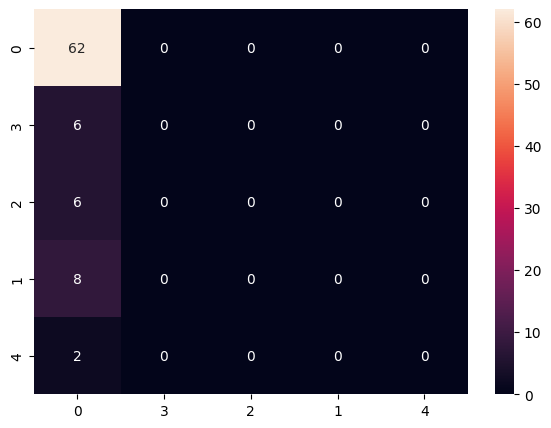

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of LSTM with Convolution is as below: \n")
perf_metrics_embedlstm(lstmmodel1)
classification_report_embedlstm(lstmmodel1)
confusion_mat_embedlstm(lstmmodel1,y_test)

**Inference:**

1.Simple LSTM model with one embedding layer,one convolution layer,one hidden and one output layer.

2.optimizer used is SGD.

3. LSTM actiuvation used is default tanh.

4.sice the data is imbalanced we have chosed weighted averages for precision,recall,f1 score and accuracy.

5.this model is able to predict only for one category 0.

6.therfore we tried lstm bidirectional model as shown below.


**LSTM with bidirectional layer**

In [ ]:
modelbirectional = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(top_words, embedding_vecor_length, input_length=max_text_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_vecor_length, activation='relu'),
    # Add a Dense layer with 5 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
modelbirectional.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
num_epochs = 10
historybidirectional = modelbirectional.fit(X_train_lst, y_train_lst_encoded, epochs=num_epochs, validation_data=(X_test_lst, y_test_lst_encoded), verbose=2)

Epoch 1/10
11/11 - 19s - 2s/step - accuracy: 0.7395 - loss: 1.5496 - val_accuracy: 0.7381 - val_loss: 1.4829
Epoch 2/10
11/11 - 17s - 2s/step - accuracy: 0.7395 - loss: 1.4339 - val_accuracy: 0.7381 - val_loss: 1.3672
Epoch 3/10
11/11 - 9s - 853ms/step - accuracy: 0.7395 - loss: 1.3224 - val_accuracy: 0.7381 - val_loss: 1.2637
Epoch 4/10
11/11 - 12s - 1s/step - accuracy: 0.7395 - loss: 1.2249 - val_accuracy: 0.7381 - val_loss: 1.1744
Epoch 5/10
11/11 - 19s - 2s/step - accuracy: 0.7395 - loss: 1.1388 - val_accuracy: 0.7381 - val_loss: 1.0925
Epoch 6/10
11/11 - 24s - 2s/step - accuracy: 0.7395 - loss: 1.0648 - val_accuracy: 0.7381 - val_loss: 1.0318
Epoch 7/10
11/11 - 16s - 1s/step - accuracy: 0.7395 - loss: 1.0129 - val_accuracy: 0.7381 - val_loss: 0.9918
Epoch 8/10
11/11 - 11s - 1s/step - accuracy: 0.7395 - loss: 0.9798 - val_accuracy: 0.7381 - val_loss: 0.9677
Epoch 9/10
11/11 - 21s - 2s/step - accuracy: 0.7395 - loss: 0.9602 - val_accuracy: 0.7381 - val_loss: 0.9539
Epoch 10/10
11/11

In [ ]:
#evaluate the model lstm with bidiectional
bdscorestrain=modelbirectional.evaluate(X_train_lst,y_train_lst_encoded)
bdscorestest=modelbirectional.evaluate(X_test_lst,y_test_lst_encoded)
print('Train: %.2f%%, Test: %.2f%%' % (bdscorestrain[1], bdscorestest[1]))

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - accuracy: 0.7317 - loss: 0.9572
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step - accuracy: 0.7636 - loss: 0.8947
Train: 0.74%, Test: 0.74%


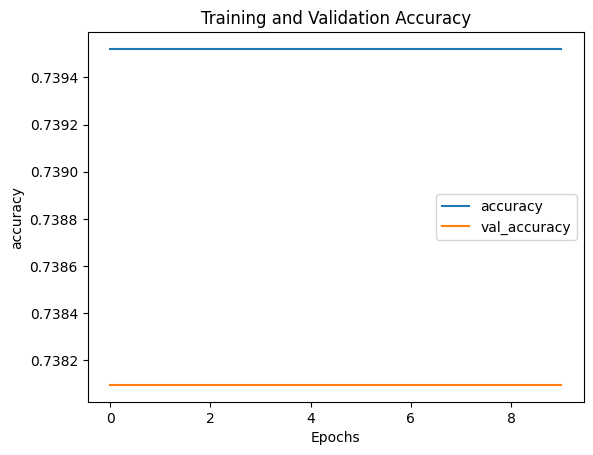

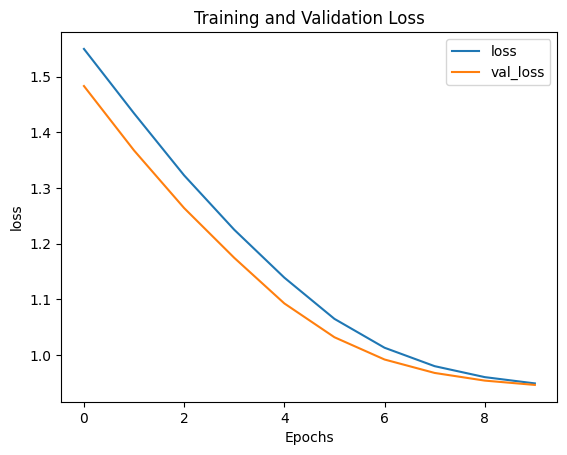

In [ ]:
#plot the loss and accuracy for bidirectional lstm model.
plot_graphs(historybidirectional, "accuracy")
plot_graphs(historybidirectional, "loss")

The loss is declining drastically and has reached 0.
Accuracy seems to be almost same 0.73 in all epochs.

The performance metrics of LSTM bidirectional is as below: 

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 542ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 343ms/step
Accuracy on training data: 0.7395209580838323
Accuracy on testing data: 0.7380952380952381
Recall on training data: 0.7395209580838323
Recall on testing data: 0.7380952380952381
Precision on training data: 0.5468912474452293
Precision on testing data: 0.5447845804988662
F1 score on training data: 0.6287837406082842
F1 score on testing data: 0.6268754076973255
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54 

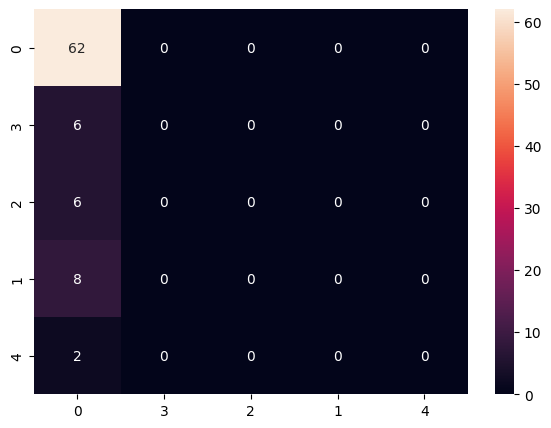

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of LSTM bidirectional is as below: \n")
perf_metrics_embedlstm(modelbirectional)
classification_report_embedlstm(modelbirectional)
confusion_mat_embedlstm(modelbirectional,y_test)

**Inference:**

1.this model is designed with one embedding layer,one bidirectional layer, one hidden layer and one output layer.

2.Optimizer used is SGD.

3.Hidden layer activation function is Relu.

4.The accuracy score for train and test data is 74%.

5.This model also fails to identify categories other than 0.we try simple lstm.

In [ ]:
# Define the basic LSTM model without embedding
lstm_model = Sequential()
lstm_model.add(LSTM(120, activation='relu', input_shape=(1, 3083)))
lstm_model.add(Dense(5,activation="softmax"))

In [ ]:
#Complie the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_5= lstm_model.fit(X_train_reshaped, y_train_formatted,validation_split=0.3, epochs=10, verbose=1)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5815 - loss: 1.5889 - val_accuracy: 0.8598 - val_loss: 1.4892
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9085 - loss: 1.4336 - val_accuracy: 0.8868 - val_loss: 1.2317
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9332 - loss: 1.1406 - val_accuracy: 0.9030 - val_loss: 0.8689
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9664 - loss: 0.7728 - val_accuracy: 0.9461 - val_loss: 0.5544
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9812 - loss: 0.4731 - val_accuracy: 0.9784 - val_loss: 0.3540
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9905 - loss: 0.2815 - val_accuracy: 0.9892 - val_loss: 0.2379
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9905 - loss: 0.1722 - val_accuracy: 0.9919 - val_loss: 0.1720
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9941 - loss: 0.1129 - val_accuracy: 0.9919 - v

In [ ]:
# Evaluate the model
trainloss, trainaccuracy = lstm_model.evaluate(X_train_reshaped, y_train_formatted)
loss, accuracy = lstm_model.evaluate(X_test_reshaped, y_test_formatted)
print(f'Train Accuracy {trainaccuracy} , Test Accuracy: {accuracy}')

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9953 - loss: 0.0458
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9841 - loss: 0.0981
Train Accuracy 0.9951456189155579 , Test Accuracy: 0.9870550036430359


The performance metrics of LSTM model is as below: 

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy on training data: 0.9951456310679612
Accuracy on testing data: 0.9870550161812298
Recall on training data: 0.9951456310679612
Recall on testing data: 0.9870550161812298
Precision on training data: 0.995210201680379
Precision on testing data: 0.9872572815533981
F1 score on training data: 0.9951470904179579
F1 score on testing data: 0.9870533319522654
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.97      0.97      0.97        61
           2       1.00      1.00      1.00        62
           3       0.97      1.00      0.98        62
           4       1.00      1.00      1.00        62

    accuracy                           0.99       309
   macro avg       0.99      0.99      0.99       309
weighted avg       0.99      0.99

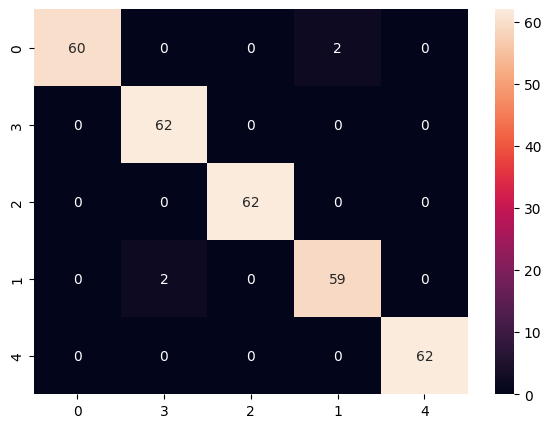

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of LSTM model is as below: \n")
perf_metrics_RNN(lstm_model)
classification_report_RNN(lstm_model)
confusion_mat_RNN(lstm_model,y_test_encoded)

**Inference:**

1. A simple LSTM with relu activation performed so well in accuracy,precision,recall and f1 score.

2. It is able to identify all categories.

3. we can further tune the model with batchnormalization and dropout techniques.

In [ ]:
# Define the LSTM model with Dropout and Batch Normalization
tuned_lstm_model = Sequential()
tuned_lstm_model.add(LSTM(120, activation='relu', input_shape=(1, 3083), return_sequences=True))
tuned_lstm_model.add(BatchNormalization())
tuned_lstm_model.add(Dropout(0.2))
tuned_lstm_model.add(LSTM(50, activation='relu'))
tuned_lstm_model.add(BatchNormalization())
tuned_lstm_model.add(Dropout(0.2))
tuned_lstm_model.add(Dense(5, activation='softmax'))

In [ ]:
# Compile the model
tuned_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_6= tuned_lstm_model.fit(X_train_reshaped, y_train_formatted, validation_split=0.3, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.5522 - loss: 1.1658 - val_accuracy: 0.1806 - val_loss: 1.6042
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9806 - loss: 0.1685 - val_accuracy: 0.1806 - val_loss: 1.5956
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9898 - loss: 0.0777 - val_accuracy: 0.1806 - val_loss: 1.5840
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9936 - loss: 0.0418 - val_accuracy: 0.3935 - val_loss: 1.5698
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9936 - loss: 0.0393 - val_accuracy: 0.3801 - val_loss: 1.5507
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9958 - loss: 0.0240 - val_accuracy: 0.3315 - val_loss: 1.5258
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9940 - loss: 0.0262 - val_accuracy: 0.2722 - val_loss: 1.4932
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9944 - loss: 0.0245 - val_accuracy: 0.2453 - v

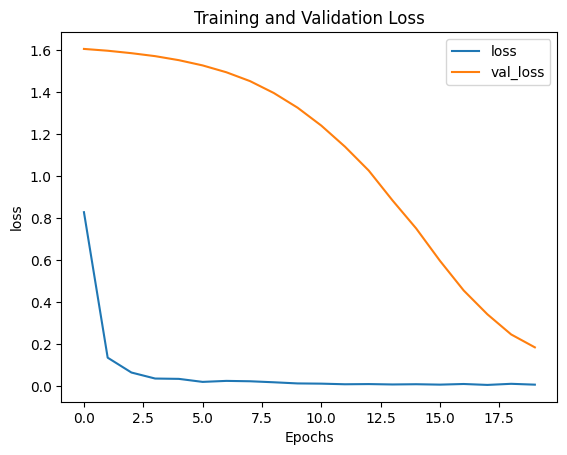

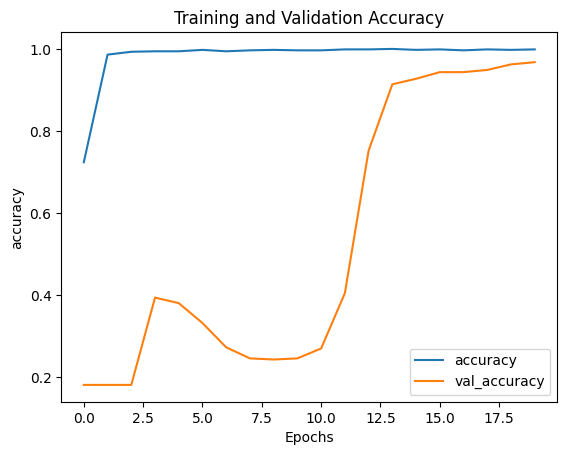

In [ ]:
plot_graphs(history_6,"loss")
plot_graphs(history_6,"accuracy")

**Inference:**

1.The model is designed with one LSTM input layer,one LSTM hidden layer and one output layer with relu activation and adam optimizer along with batchnormalization and dropout.

2.Loss tend to slope down severely from epoch1, it has reachedd 0.00 almost from epoch 14.

3.Train and test accuracy are almost balanced from epoch 15.

In [ ]:
# Evaluate the model
trainloss, trainaccuracy = tuned_lstm_model.evaluate(X_train_reshaped, y_train_formatted)
loss, accuracy = tuned_lstm_model.evaluate(X_test_reshaped, y_test_formatted)
print(f'Train Accuracy {trainaccuracy} , Test Accuracy: {accuracy}')

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9946 - loss: 0.1020
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9549 - loss: 0.1870
Train Accuracy 0.987864077091217 , Test Accuracy: 0.9482200741767883


The performance metrics of Tuned LSTM model is as below: 

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy on training data: 0.9878640776699029
Accuracy on testing data: 0.948220064724919
Recall on training data: 0.9878640776699029
Recall on testing data: 0.948220064724919
Precision on training data: 0.9883169934587812
Precision on testing data: 0.9564582978481804
F1 score on training data: 0.987868813080313
F1 score on testing data: 0.9479877751108421
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        62
           1       0.97      0.95      0.96        61
           2       1.00      1.00      1.00        62
           3       0.82      1.00      0.90        62
           4       1.00      1.00      1.00        62

    accuracy                           0.95       309
   macro avg       0.96      0.95      0.95       309
weighted avg       0.96     

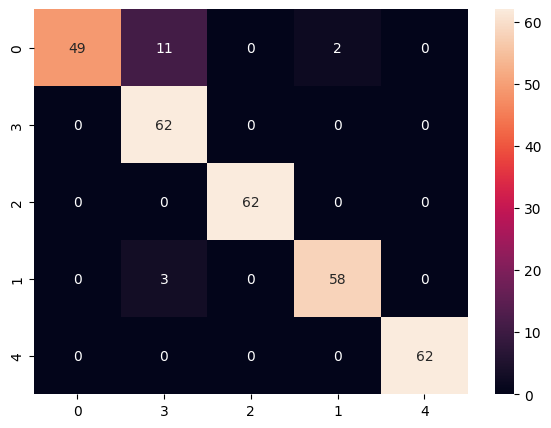

In [ ]:
#make predictions and print the performance metrics
print("The performance metrics of Tuned LSTM model is as below: \n")
perf_metrics_RNN(tuned_lstm_model)
classification_report_RNN(tuned_lstm_model)
confusion_mat_RNN(tuned_lstm_model,y_test_encoded)

**Inference:**

1.This model on evaluation has a balanced accuracy for train and test.

2.It is able to identify all categories.

3.the precision,recall and f1score for all categories are satisfactory.

In [ ]:
#Comparing the performance of each NN model in train stage and test stage
#defining list of models
models_nn = [modelbasicnn,mlprelu,mlprelubatchnormal,adammodel]
#defining empty lists to add train & test results
accuracy_train_nn = []
accuracy_test_nn = []
recall_train_nn = []
recall_test_nn = []
precision_train_nn = []
precision_test_nn = []
f1score_train_nn = []
f1score_test_nn = []
#looping through all the models
for model_2 in models_nn:
    j= perf_metrics_NN(model_2,False)
    accuracy_train_nn.append(np.round(j[0],2))
    accuracy_test_nn.append(np.round(j[1],2))
    recall_train_nn.append(np.round(j[2],2))
    recall_test_nn.append(np.round(j[3],2))
    precision_train_nn.append(np.round(j[4],2))
    precision_test_nn.append(np.round(j[5],2))
    f1score_train_nn.append(np.round(j[6],2))
    f1score_test_nn.append(np.round(j[7],2))

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
#Store the accuracy results for each NN model in a dataframe
results_nn = pd.DataFrame({'Model':['Basic Neural Network with sigmoid','Tuned Neural Network with weight initialization','Tuned Neural Network with bidirectional','basic neural network with adam optimizer'],
                         'Train accuracy': accuracy_train_nn, 'Test accuracy': accuracy_test_nn,
                         'Train recall': recall_train_nn, 'Test recall': recall_test_nn,
                         'Train precision': precision_train_nn, 'Test precision': precision_test_nn,
                         'Train F1 Score': f1score_train_nn, 'Test F1 Score': f1score_test_nn})

In [ ]:
#Comparing the performance of RNN & LSTM model in train stage and test stage
#defining list of models
models_rnn = [rnn_model,tuned_lstm_model,lstm_model,tuned_lstm_model]
#defining empty lists to add train & test results
accuracy_train_rnn = []
accuracy_test_rnn = []
recall_train_rnn = []
recall_test_rnn = []
precision_train_rnn = []
precision_test_rnn = []
f1score_train_rnn = []
f1score_test_rnn = []
#looping through all the models
for model_3 in models_rnn:
    j= perf_metrics_RNN(model_3,False)
    accuracy_train_rnn.append(np.round(j[0],2))
    accuracy_test_rnn.append(np.round(j[1],2))
    recall_train_rnn.append(np.round(j[2],2))
    recall_test_rnn.append(np.round(j[3],2))
    precision_train_rnn.append(np.round(j[4],2))
    precision_test_rnn.append(np.round(j[5],2))
    f1score_train_rnn.append(np.round(j[6],2))
    f1score_test_rnn.append(np.round(j[7],2))

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
#add embedded lstm models
models_embedlstm = [lstmmodel1,modelbirectional]
#defining empty lists to add train & test results
accuracy_train_embedlstm = []
accuracy_test_embedlstm = []
recall_train_embedlstm = []
recall_test_embedlstm = []
precision_train_embedlstm = []
precision_test_embedlstm = []
f1score_train_embedlstm = []
f1score_test_embedlstm = []
#looping through all the models
for model_embed in models_embedlstm:
    j= perf_metrics_embedlstm(model_embed,False)
    accuracy_train_embedlstm.append(np.round(j[0],2))
    accuracy_test_embedlstm.append(np.round(j[1],2))
    recall_train_embedlstm.append(np.round(j[2],2))
    recall_test_embedlstm.append(np.round(j[3],2))
    precision_train_embedlstm.append(np.round(j[4],2))
    precision_test_embedlstm.append(np.round(j[5],2))
    f1score_train_embedlstm.append(np.round(j[6],2))
    f1score_test_embedlstm.append(np.round(j[7],2))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step


In [ ]:
#Store the accuracy results for LSTM embed models in a dataframe
results_embedlstm = pd.DataFrame({'Model':['LSTM Embed', 'LSTM Bidirectional'],
                         'Train accuracy': accuracy_train_embedlstm, 'Test accuracy': accuracy_test_embedlstm,
                         'Train recall': recall_train_embedlstm, 'Test recall': recall_test_embedlstm,
                         'Train precision': precision_train_embedlstm, 'Test precision': precision_test_embedlstm,
                         'Train F1 Score': f1score_train_embedlstm, 'Test F1 Score': f1score_test_embedlstm})

In [ ]:
#Store the accuracy results for RNN & LSTM model in a dataframe
results_rnn = pd.DataFrame({'Model':['Basic RNN','Tuned RNN','Basic LSTM', 'Tuned LSTM'],
                         'Train accuracy': accuracy_train_rnn, 'Test accuracy': accuracy_test_rnn,
                         'Train recall': recall_train_rnn, 'Test recall': recall_test_rnn,
                         'Train precision': precision_train_rnn, 'Test precision': precision_test_rnn,
                         'Train F1 Score': f1score_train_rnn, 'Test F1 Score': f1score_test_rnn})

In [ ]:
#Concat NN, RNN,LSTM embed & LSTM models to compare the results
results_nn = pd.concat([results_nn,results_rnn,results_embedlstm]).reset_index(drop=True)
results_nn

,Model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train F1 Score,Test F1 Score
0,Basic Neural Network with sigmoid,0.20,0.20,0.20,0.20,0.04,0.04,0.07,0.07
1,Tuned Neural Network with weight initialization,0.30,0.29,0.30,0.29,0.52,0.52,0.18,0.17
2,Tuned Neural Network with bidirectional,0.68,0.67,0.68,0.67,0.73,0.73,0.66,0.65
3,basic neural network with adam optimizer,0.99,0.97,0.99,0.97,0.99,0.97,0.99,0.97
4,Basic RNN,1.00,0.99,1.00,0.99,1.00,0.99,1.00,0.99
5,Tuned RNN,0.99,0.95,0.99,0.95,0.99,0.96,0.99,0.95
6,Basic LSTM,1.00,0.99,1.00,0.99,1.00,0.99,1.00,0.99
7,Tuned LSTM,0.99,0.95,0.99,0.95,0.99,0.96,0.99,0.95
8,LSTM Embed,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63
9,LSTM Bidirectional,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63


In [ ]:
#Concat the above results with ML models
results_final = pd.concat([results_nn,results_df]).reset_index(drop=True)
results_final

,Model,Train accuracy,Test accuracy,Train recall,Test recall,Train precision,Test precision,Train F1 Score,Test F1 Score
0,Basic Neural Network with sigmoid,0.20,0.20,0.20,0.20,0.04,0.04,0.07,0.07
1,Tuned Neural Network with weight initialization,0.30,0.29,0.30,0.29,0.52,0.52,0.18,0.17
2,Tuned Neural Network with bidirectional,0.68,0.67,0.68,0.67,0.73,0.73,0.66,0.65
3,basic neural network with adam optimizer,0.99,0.97,0.99,0.97,0.99,0.97,0.99,0.97
4,Basic RNN,1.00,0.99,1.00,0.99,1.00,0.99,1.00,0.99
5,Tuned RNN,0.99,0.95,0.99,0.95,0.99,0.96,0.99,0.95
6,Basic LSTM,1.00,0.99,1.00,0.99,1.00,0.99,1.00,0.99
7,Tuned LSTM,0.99,0.95,0.99,0.95,0.99,0.96,0.99,0.95
8,LSTM Embed,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63
9,LSTM Bidirectional,0.74,0.74,0.74,0.74,0.55,0.54,0.63,0.63


**Choose the best performing classifier and pickle it.**

Based on above table with all models compared, RNN,Tuned RNN, LSTM,Tuned LSTM, Neural network with Adam Optimizer models have performed with all improved classification metrics.Any one of these models can be chosen for pickling.

In [ ]:
# Save the model with best result to disk
#Setting up file name to which model will be saved
filename = 'finalized_model.sav'

with open (filename, 'wb') as adamnn_model_pkl:
    pickle.dump(adammodel,adamnn_model_pkl)

# Load the model from disk
with open (filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Evaluate the model from Loaded Model Object
trainloss, trainaccuracy = loaded_model.evaluate(X_train_converted,y_train_formatted)
loss, accuracy = loaded_model.evaluate(X_test_converted, y_test_formatted)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9957 - loss: 0.0116
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9778 - loss: 0.0586 


In [ ]:
print ("Acuracy from saved model")
print(f'Train Accuracy: {np.round(trainaccuracy,2)} , Test Accuracy: {np.round(accuracy,2)}')
print ("######################################################")
print ("Accuracy from stored dataframe")
filtered_res = results_final.loc[results_final['Model'] == 'basic neural network with adam optimizer'][['Model','Train accuracy','Test accuracy']]
print (filtered_res)

Acuracy from saved model
Train Accuracy: 0.99 , Test Accuracy: 0.97
######################################################
Accuracy from stored dataframe
                                      Model  Train accuracy  Test accuracy
3  basic neural network with adam optimizer            0.99           0.97


**Inference:**


Above comparision shows we saved our best model by pickling and loaded same file without any change in classification metrics.

**Testing pickled model with input description from Test data and new sample data**

In [ ]:
# Test sample from existing Test data to show match.
X_test_sample = X_test_converted[35:40]
pred_test_sample= loaded_model.predict(X_test_sample)
pred_test_sample = np.argmax(pred_test_sample, axis=1)
print (pred_test_sample)
print (y_test_encoded[35:40])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[4 3 2 4 2]
[4 3 2 4 2]


In [ ]:
#Function to test new sample

def test_model_with_input (test_string):

    #Format and vectorise same way like training data
    sampleinput = remove_special_characters (test_string)
    sampleinput = str.lower(sampleinput)
    sampleinput = str.strip(sampleinput)
    sampleinput = remove_stopwords(sampleinput)

    sampleinput = apply_Lemmatizer(sampleinput)
    sampleinput = pd.Series(sampleinput)
    tfidf_sample_matrix = Tf_idf_vectorizer.transform(sampleinput)
    tfidf_sample_df = pd.DataFrame(tfidf_sample_matrix.toarray(), columns=Tf_idf_vectorizer.get_feature_names_out())

    print (tfidf_sample_df)

    #Now we shall try to predict. Expected target output levels in encoded format.
    pred_test_sample= loaded_model.predict(tfidf_sample_df)
    pred_test_sample = np.argmax(pred_test_sample, axis=1)
    print (f'Input Text Description : {sampleinput_orig}')
    print (f'Model Prediction -  Accident Level for Input Text Description is : {pred_test_sample}')

In [ ]:
sampleinput_orig = "During the process of loading drills, the operator positions the basket 186 equipment at a height of 25m to carry out the loading of the production drills; At this moment, a stone slab of failed from the front of the pit, which is tilted and lodged inside the basket, trapping the right leg of the labour."

test_model_with_input(sampleinput_orig)

    00  001  007   01  018  0183   02  020  02bp0166  02bp0167  ...  young  \
0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0       0.0       0.0  ...    0.0   

   z014  zaf  zamac  zaro  zero  zinc  zinco   zn  zone  
0   0.0  0.0    0.0   0.0   0.0   0.0    0.0  0.0   0.0  

[1 rows x 3083 columns]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Input Text Description : During the process of loading drills, the operator positions the basket 186 equipment at a height of 25m to carry out the loading of the production drills; At this moment, a stone slab of failed from the front of the pit, which is tilted and lodged inside the basket, trapping the right leg of the labour.
Model Prediction -  Accident Level for Input Text Description is : [4]


**Inference:**

We ran our predction with new sample description which is very close to one of our test data set but not exactly same. Neural network with ADAM optimizer model predicted accident level for new description matches with accident level of test data set.